## C Class project - Finbee - Predicting default on P2P loans

Project details - https://github.com/mokahaiku/toai_workshops
Data [Finbee.lt](https://www.finbee.lt/apie-mus/paskolu-portfelio-eksportas/)

When investing in P2P loans everyone wants to reduce risk. 

With help of ML we can try to build models and predict which users are good investments and which are not.



**Requirements**
* Do exploratory data analysis. (Ok vs Default loans)
* Do feature engineering.
* Do feature preprocessing.
* Build a machine learning model.
* Explore your model results.

**Bonus Points**
* Move your final model to a Python module.
* Compare multiple machine learning models.
* Do hyperparameter tuning.
* Deploy the model on your own machine.
* Deploy the model on external service.

**To do**:
* Use a pipeline
* Data imputation etc.
* Analyse feature importance in models


### Importing needed modules

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
from datetime import date
import holidays

### Reading file

In [307]:
data_xls = pd.read_excel('loans.xlsx', index_col=None)
data_xls.to_csv('loans.csv', encoding='utf-8', index=False)
df = pd.read_csv('loans.csv', parse_dates=['creation_date'])
pd.set_option('display.max_columns', None)  

### Exploring data


**listing_id**	Unikalus numeris, kuris suteikiamas kiekvienai paskolai.

**creation_date**	Paskolos paraiškos pateikimo data.

**loan_paid_date**	Paskolos išmokėjimo data.

**first_installement_date**	Pirmos mėnesinės įmokos data.

**loan_paid_status**	Paskolos išmokėjimo statusas (1 – paskola išmokėta, 0 – paskola dar neišmokėta).

**confirm_status**	Paskolos statusas (1 – paskolos gavėjas priėmė paskolos pasiūlymą, 3 – paskola pilnai grąžinta).

**username**	Paskolos gavėjo vartotojo vardas.

**listing_title**	Unikalus paskolos pavadinimas.

**listing_category**	Paskolos paskirtis.

**credit_score**	Paskolos gavėjui suteiktas kredito rizikos balas.

**job_loss_insurance**	Paskolos gavėjui netekus darbo ne savo noru ADB „Gjensidige“ mokės paskolos įmokas iki 6 mėn. (1 – galioja draudimas nuo priverstinio nedarbo, 0 – draudimas nuo priverstinio nedarbo negalioja).

**loan_amount**	Paskolos suma.

**loan_period**	Paskolos terminas mėnesiniais.

**effective_rate**	Paskolos palūkanų norma, kurią paskolos gavėjas moka investuotojams.

**preferred_rate**	Pageidaujama paskolos gavėjo palūkanų norma.

**amount_outstanding**	Likusi negrąžinta paskolos dalis šiai dienai.

**monthly_installment**	Mėnesinė paskolos įmoka.

**principal_repaid**	Grąžinta paskolos dalis.

**interest_paid**	Paskolos gavėjo sumokėtų palūkanų suma.

**arrears**	Visų vėluojančių paskolos įmokų suma.

**loan_status**	Paskolos būsena (ok – nėra vėluojančių įmokų, late – praleista viena paskolos įmoka, arrears – praleistos dvi 

paskolos įmokos, default – praleistos trys ir daugiau paskolos įmokos).

**type**	Paskolos tipas (B – paskola sufinansuota aukcione).

**gender**	Paskolos gavėjo lytis.

**post_town**	Miestas, kuriame gyvena paskolos gavėjas.

**age**	Paskolos gavėjo amžius.

**education**	Paskolos gavėjo išsilavinimas.

**employment_status**	Paskolos gavėjo darbo sutarties tipas paskolos išdavimo momentu.

**occupation**	Paskolos gavėjo užimamos pareigos paskolos išdavimo momentu.

**employ_how_long**	Paskolos gavėjo darbo trukmė mėnesiais dabartinėje darbovietėje.

**years_working_in_total**	Paskolos gavėjo darbo stažas metais.

**dependants**	Nepilnamečių vaikų/išlaikytinių skaičius.

**marital_status**	Paskolos gavėjo vedybininis statusas.

**credit_check_date**	Paskolos gavėjo mokumo vertinimo data.

**monthly_income**	Paskolos gavėjo namų ūkio pajamos, kurias jis gavo paskolos suteikimo metu. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio pajamas sudaro tik jo vieno pajamos.

**monthly_expenses**	Paskolos gavėjo namų ūkio mokamos kitų paskolų įmokos. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio paskolų įmokas sudaro tik jo vieno paskolų įmokos.

**available_income**	Grynosios pajamos apskaičiuojamos pagal formulę: namų ūkio mėnesio pajamos – namų ūkio turimų kitų paskolų įmokos.

**dti**	Visų paskolų įmokų ir pajamų santykis apskaičiuojamas pagal formulę: namų ūkio turimų ir naujų paskolų mėnesinės įmokos / namų ūkio grynosios mėnesio pajamos.

**outstanding_debts**	Esama nepadengta skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

**last_debt_date**	Data, kada buvo registruota paskutinė skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

In [308]:
df

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.2600,0.26,3305.00,150.63,0.00,0.00,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.2600,0.26,1900.00,86.59,0.00,0.00,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.1900,0.19,665.00,63.79,0.00,0.00,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.1300,0.13,1040.00,96.26,0.00,0.00,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.1300,0.13,2830.00,143.81,0.00,0.00,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,38,2015-08-19,2015-08-25,2015-09-25,1,3,Elegi,"""Paskolu refinansavimui",Consolidation of Other Loans,D,0,2250,18,0.3156,0.30,0.00,158.52,2250.01,603.37,0.0,ok,B,Female,"Trakų rajonas, Bražuolės kaimas",40,Graduate,Employed,Barmenė,72 or more,12,2,Married,-,420,0,420,0.3626,0,-
9010,28,2015-08-18,2015-08-21,2015-09-21,1,3,egle,"""Persiskolinti",Consolidation of Other Loans,C,0,2000,27,0.2583,0.25,0.00,1277.55,2000.01,458.90,0.0,ok,B,Female,Šilutė,36,Post graduate,Employed,Valstybės tarnautoja/Public servant,48,8,0,Single,2015-11-17 00:00:00,900,127,773,0.2496,0,-
9011,3,2015-08-13,2015-08-20,2015-09-20,1,3,Algirdas,"""Vartojimo paskola, vartojimui, mokinimosi išl...",Other Purposes,D,0,1300,24,0.2525,0.25,0.00,690.85,1299.99,294.96,0.0,ok,B,Male,Kaunas,29,Post graduate,Employed,Inžinierius-projektuotojas,9,2,0,Single,-,510,14,496,0.1635,0,-
9012,2,2015-08-12,2015-08-28,2015-09-27,1,1,Bitute,"""Refinansavimas",Consolidation of Other Loans,C,0,2700,54,0.2582,0.20,473.87,85.03,2226.13,1855.32,0.0,ok,B,Female,Vilnius,33,Post graduate,Employed,Specialistė / Specialist,60,10,0,Single,-,590,0,590,0.1292,0,-


In [309]:
#Remove rows with missing values
df.isnull().sum()
df = df.dropna()

#Keep only rows with 'ok' & 'default' loan_status
df = df[(df['loan_status'] == 'ok') | (df['loan_status'] == 'default')]


#Latest defaulted person '2019-06-01', remove recent loans
df = df[df['creation_date'] < '2019-06-02']
df.shape

(7690, 39)

In [310]:
ok_df = df[df['loan_status'] == 'ok']
default_df = df[df['loan_status'] == 'default']

### Exploratory data analysis EDA

posx and posy should be finite values


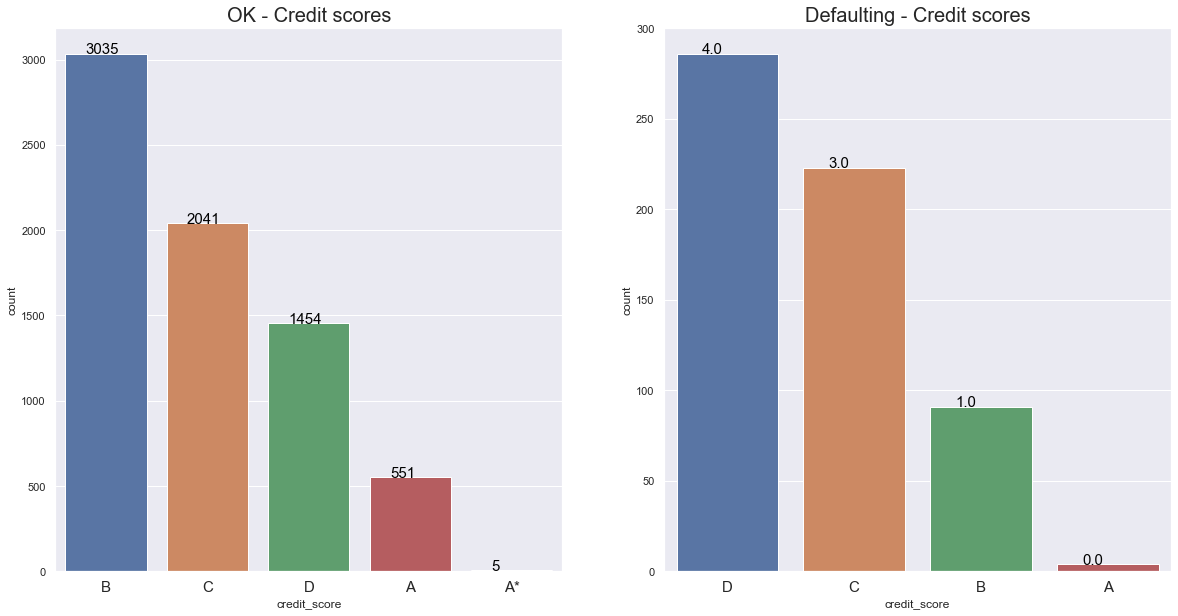

posx and posy should be finite values
posx and posy should be finite values


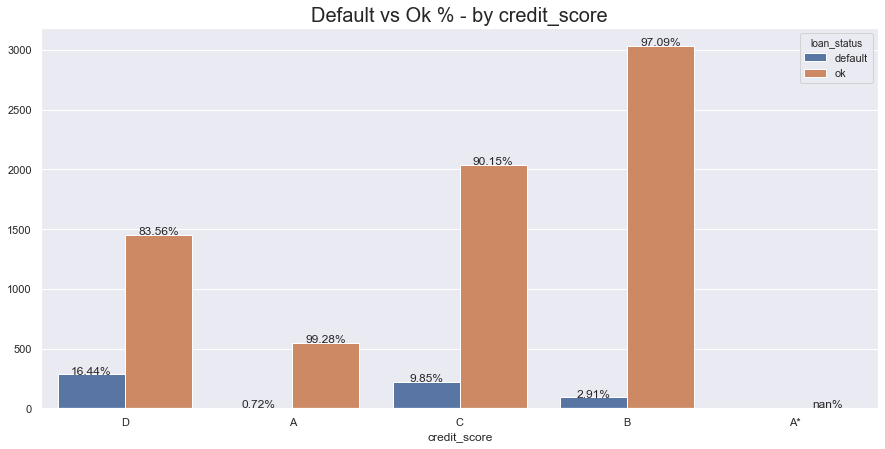

In [311]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='credit_score',data=ok_df, order=ok_df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("OK - Credit scores", fontsize=20)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)   
ax = sns.countplot(x='credit_score',data=default_df,order=default_df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Defaulting - Credit scores", fontsize=20)

total = len(df['credit_score'])

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((100*i.get_height()/total),)), fontsize=15, color='black'), 

    
plt.figure(figsize=(15,7))
order = sorted(df['credit_score'].unique())
ax3 = sns.countplot(x="credit_score", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by credit_score", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Avoid
* D - (16.44% of D loans) 
* C - (9.85% of C loans).
## Good ones:
* B - (2.91% of B loans)
* A - (0.72% of A loans)

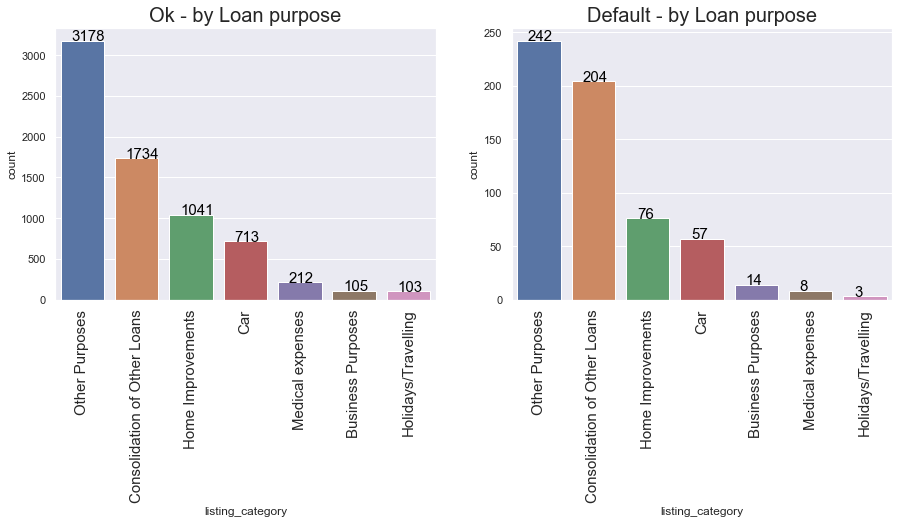

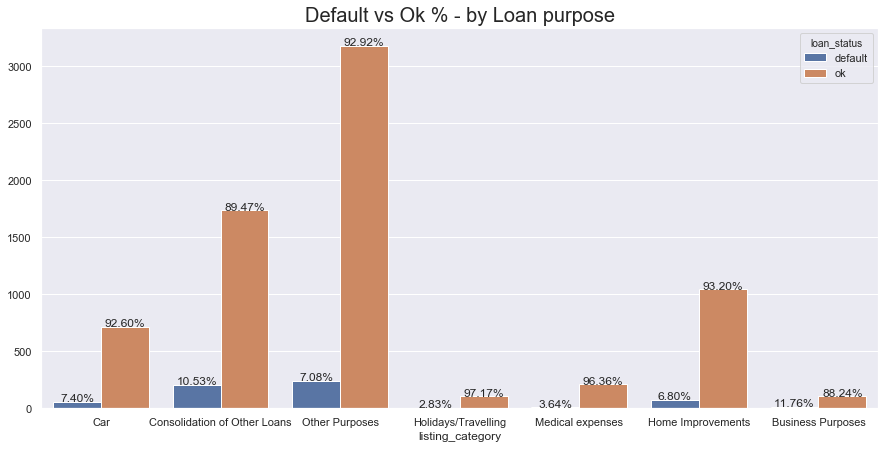

In [312]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='listing_category',data=ok_df,order=ok_df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Ok - by Loan purpose", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)
ax = sns.countplot(x='listing_category',data=default_df,order=default_df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Default - by Loan purpose", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(15,7))
order = sorted(df['listing_category'].unique())
ax3 = sns.countplot(x="listing_category", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by Loan purpose", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Avoid:
* "Business Purposes" loans 11.76% from all default
* "Consolidation of other loans" 10.53% from all default

Text(0.5, 1.0, 'Loan amount in EUR range (Default vs OK)')

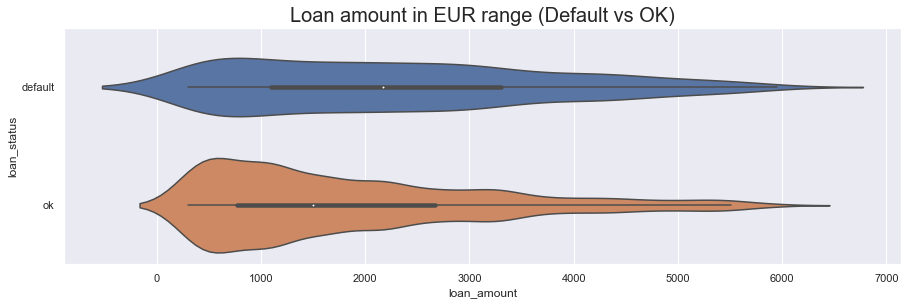

In [313]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x="loan_amount", y="loan_status", data=df[df['loan_amount']<6000])
ax.set_title('Loan amount in EUR range (Default vs OK)', fontsize=20)

Text(0.5, 1.0, 'Loan period range in months')

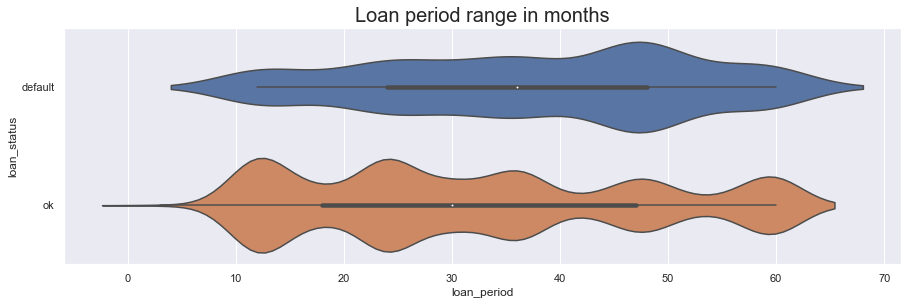

In [314]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax2 = sns.violinplot(x='loan_period', y="loan_status" ,data=df,) 
ax2.set_title('Loan period range in months', fontsize=20)

Defaulting clients, prefer longer periods.

Text(0.5, 1.0, 'Loan rate %')

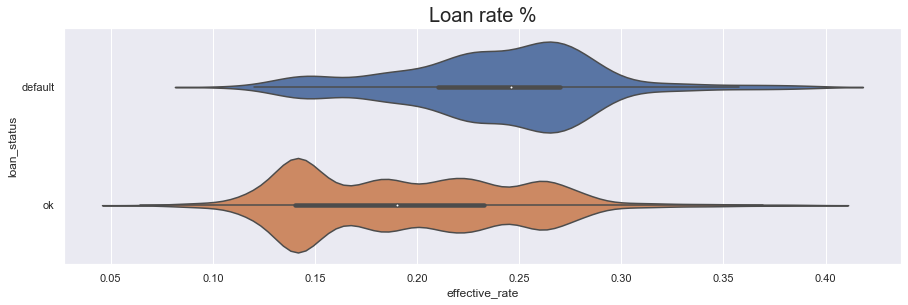

In [315]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='effective_rate', y="loan_status", data=df,) 
ax.set_title('Loan rate %', fontsize=20)

Defaulting clients are mostly those whos Loan rate < 20% +.

Text(0.5, 1.0, 'Monthly payment size in Eur')

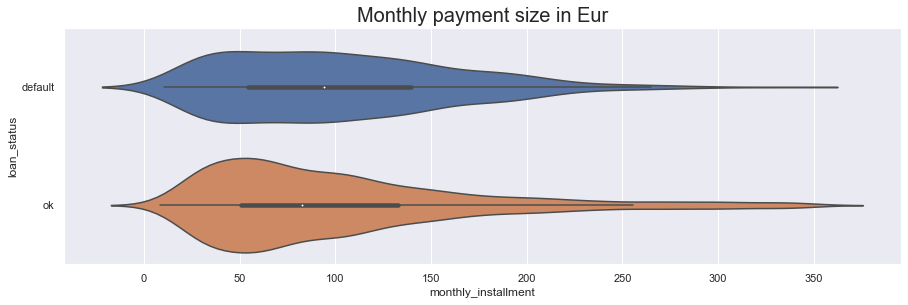

In [316]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='monthly_installment', y="loan_status", data=df[df['monthly_installment'] < 350], showfliers=False) 
ax.set_title('Monthly payment size in Eur', fontsize=20)

Text(0.5, 1.0, 'Default loans by Gender ')

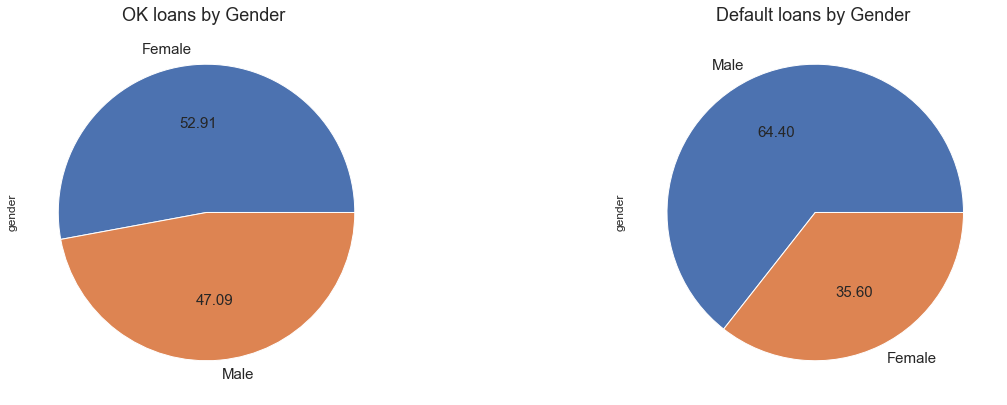

In [317]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
ok_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("OK loans by Gender ", fontsize=18 )
plt.subplot(2,2,2)
default_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Default loans by Gender ", fontsize=18 )

Men ten to default more than women. 64.4% vs 35.6%

Text(0.5, 1.0, 'Gender by age (Default)')

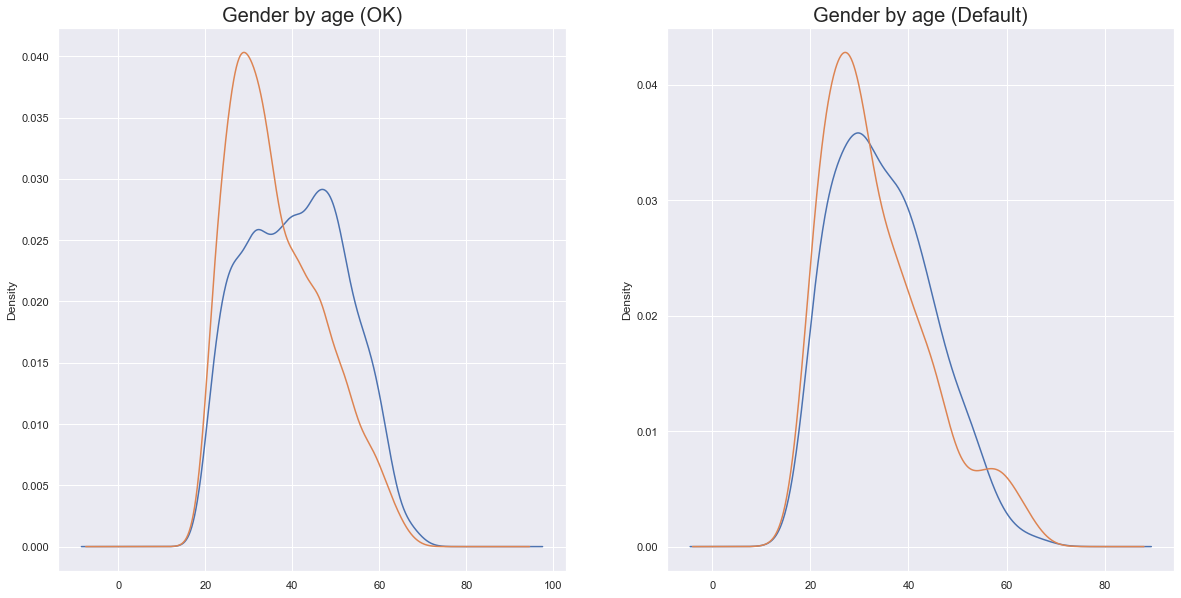

In [318]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ok_df.groupby('gender').age.plot(kind='kde')
plt.title('Gender by age (OK)',fontsize=20)

plt.subplot(1,2,2)
default_df.groupby('gender').age.plot(kind='kde')
plt.title('Gender by age (Default)',fontsize=20)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


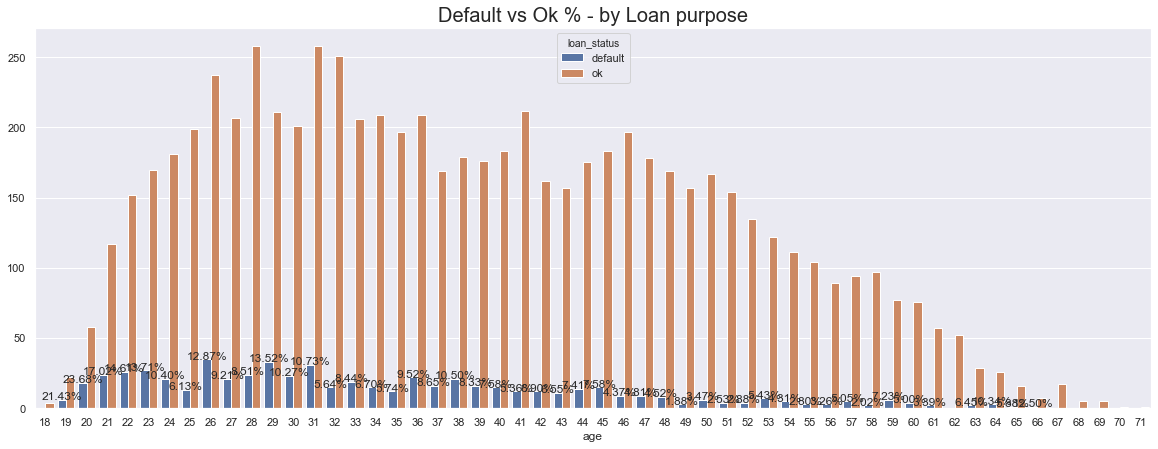

In [319]:
plt.figure(figsize=(20,7))
order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by Loan purpose", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    #ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Which are top 10 the most risky years, with largest Default %?

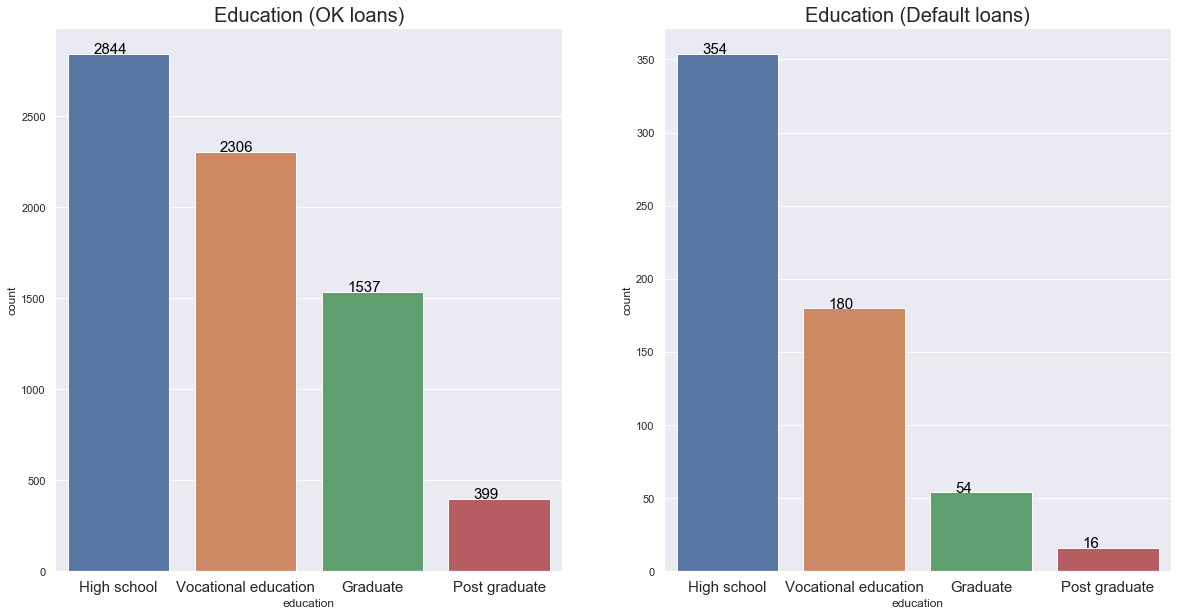

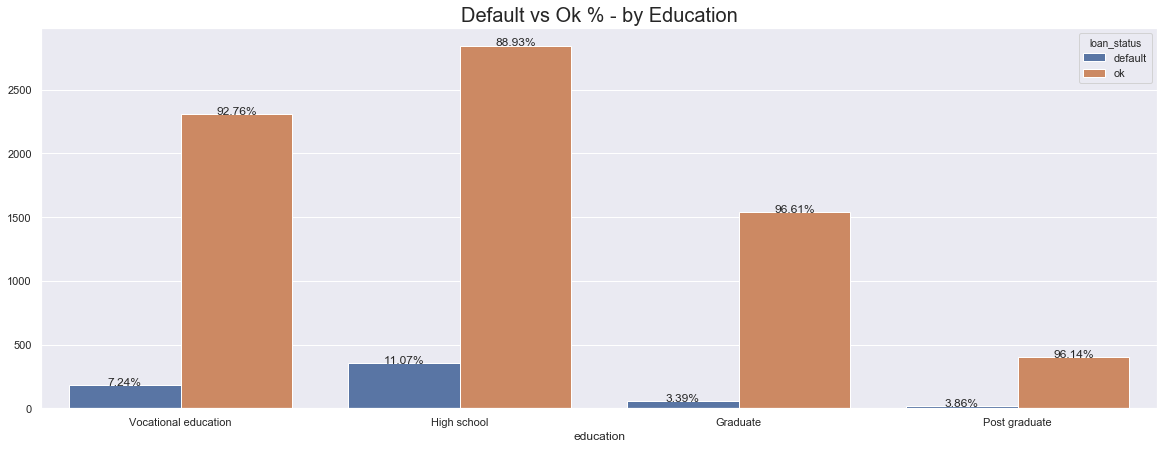

In [320]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1) 
ax = sns.countplot(x='education',data=ok_df,order=ok_df['education'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Education (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='education',data=default_df,order=default_df['education'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Education (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['education'].unique())
ax3 = sns.countplot(x="education", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by Education", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Risky:
* High School - 11.07%
* Vocational Edu - 7.24%

## Good choice:
* Graduates - 3.39% 
* st Graduates - 3.86%

posx and posy should be finite values
posx and posy should be finite values


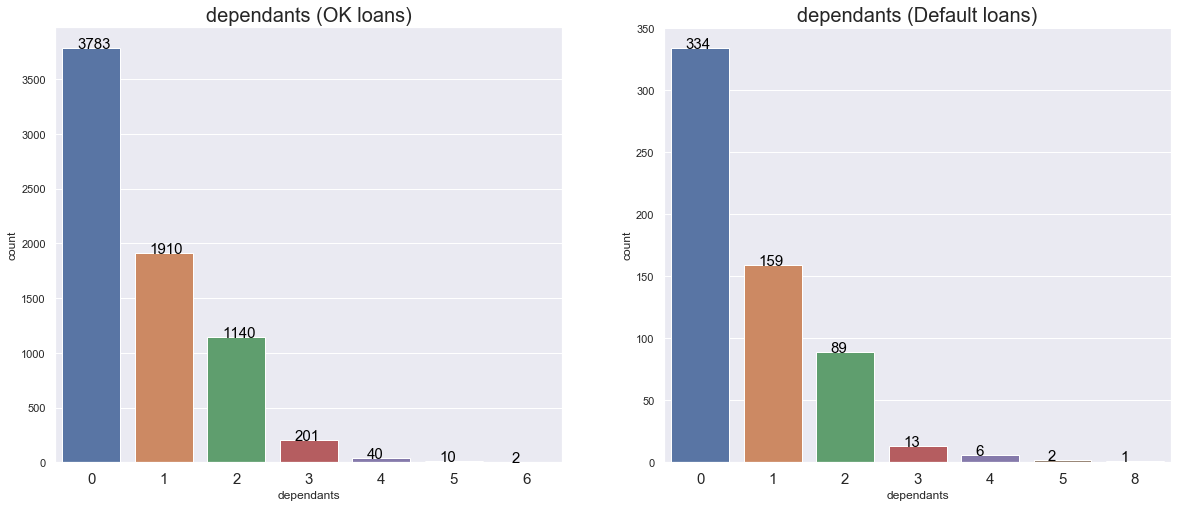

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


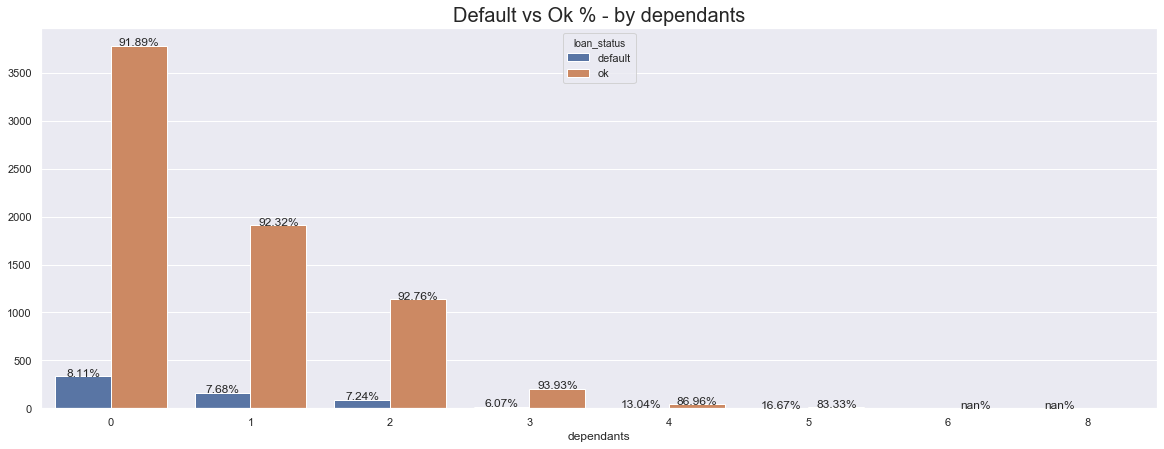

In [321]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='dependants',data=ok_df,order=ok_df['dependants'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("dependants (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='dependants',data=default_df,order=default_df['dependants'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("dependants (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['dependants'].unique())
ax3 = sns.countplot(x="dependants", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by dependants", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Risky:
* 5 children = 16.67% default (Only 12 values)
* 4 children = 13.04% default (Only 46 values)

### Better options:
* 0 children = 8.11% default
* 1 children = 7.68% default
* 3 children = 6.07% default


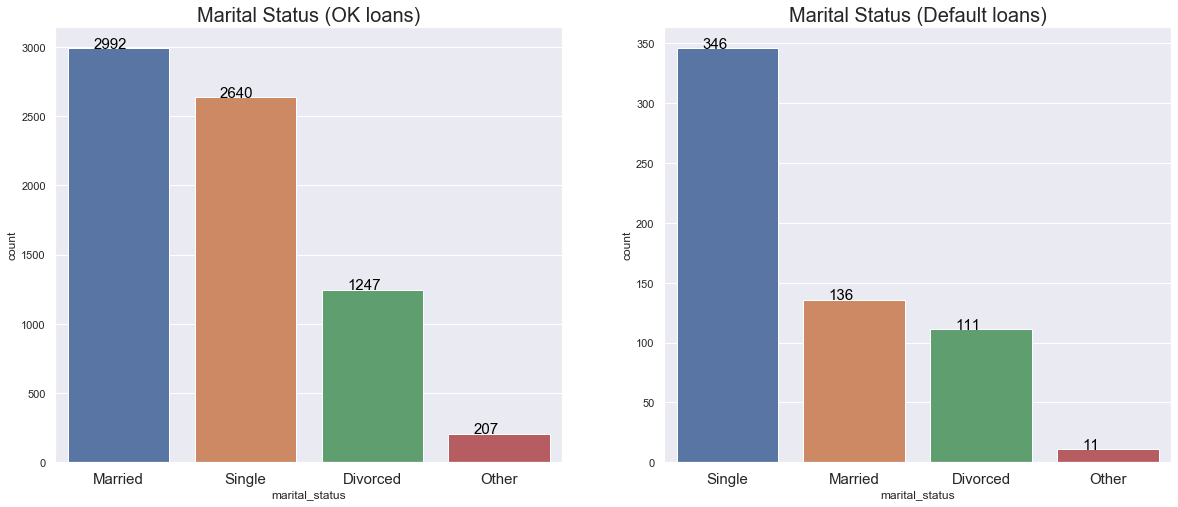

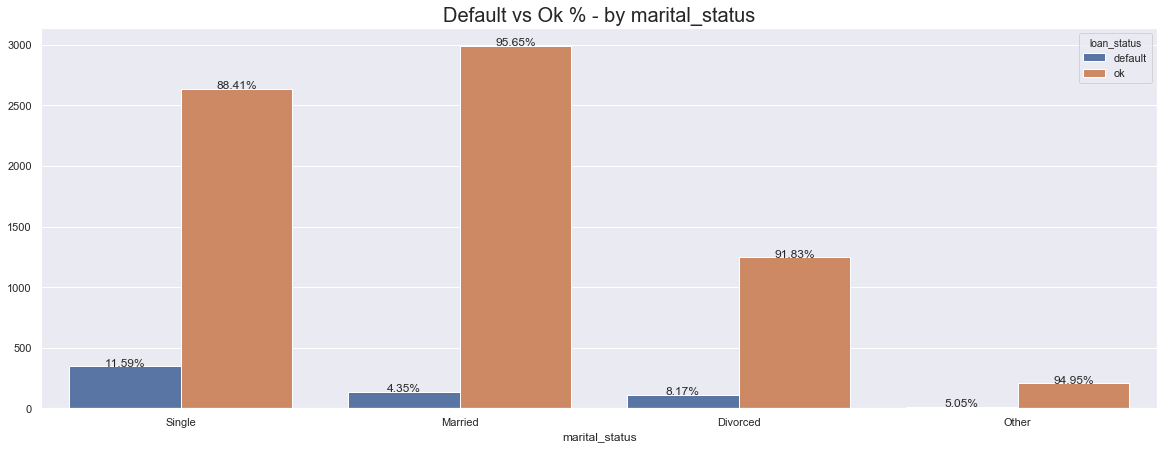

In [322]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='marital_status',data=ok_df);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Marital Status (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='marital_status',data=default_df);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Marital Status (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['marital_status'].unique())
ax3 = sns.countplot(x="marital_status", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by marital_status", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Risky:
* Single - 11.59%
* Divorced - 8.17%

### Good choice:
* Married - 4.35%

# Feature enginering

Extract from dates:
- Year +
- quarter +
- Month +
- Day of the week +
- Season (Summer, Winter, Autum, Spring) + 
- is holiday (Lithuanian holidays) +
- Week of year + 
- day of month +
- Day of year +
- weather?
- move cities to regions of lithuania, like (Aukstaitija etc...)
- Add age groups +

In [323]:
#Function to label data by season
def season(s):
    if s.month in [12,1,2]:
        return 'winter' 
    elif s.month in [3,4,5]:
        return 'spring' 
    elif s.month in [6,7,8]:
        return 'summer' 
    elif s.month in [9,10,11]:
        return 'autumn'
    

#Function to label data by season number    
def season_number(s):
    if s.season == 'winter':
        return 4 
    elif s.season == 'spring':
        return 1
    elif s.season == 'summer':
        return 2
    elif s.season == 'autumn':
        return 3
    
#Checks if day was a holiday
lithuanian_holidays = [] 
for date in holidays.Lithuania(years=[2015,2016,2018,2019]).items():
    lithuanian_holidays.append(date[0])
def inlithuanian_holidays(s):
    if s.creation_date in lithuanian_holidays:
        return 1
    else:
        return 0
    
#Function to sort people to age groups
def age_grouping(s):
    if s.age < 20:
        return "to 19"
    elif s.age >= 20 and s.age < 23:
        return "19 to 23"
    elif s.age >= 23 and s.age < 30:
        return "23 to 30"
    elif s.age >= 30 and s.age < 40:
        return "30 to 40"
    elif s.age >= 40 and s.age < 50:
        return "40 to 50"
    elif s.age >= 50 and s.age < 60:
        return "40 to 50"
    elif s.age >= 60:
        return "60+"

    
df['year'] = df.creation_date.dt.year
df['month'] = df.creation_date.dt.month
df['quarter'] = df.creation_date.dt.quarter
df['dayofweek'] = df.creation_date.dt.dayofweek + 1
df['dayofweek_name'] = df.creation_date.dt.weekday_name
df['is_weekend'] = np.where(df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
df['dayofmonth'] = df.creation_date.dt.day
df['dayofyear'] = df.creation_date.dt.dayofyear
df['week_number'] = df.creation_date.dt.week    
df['season'] =  df.apply(season, axis=1)
df['season_number'] =  df.apply(season_number, axis=1)
df['is_holiday'] = df.apply(inlithuanian_holidays, axis=1)
df['age_group'] = df.apply(age_grouping, axis=1)

## Continue EDA with Feature engineered Data

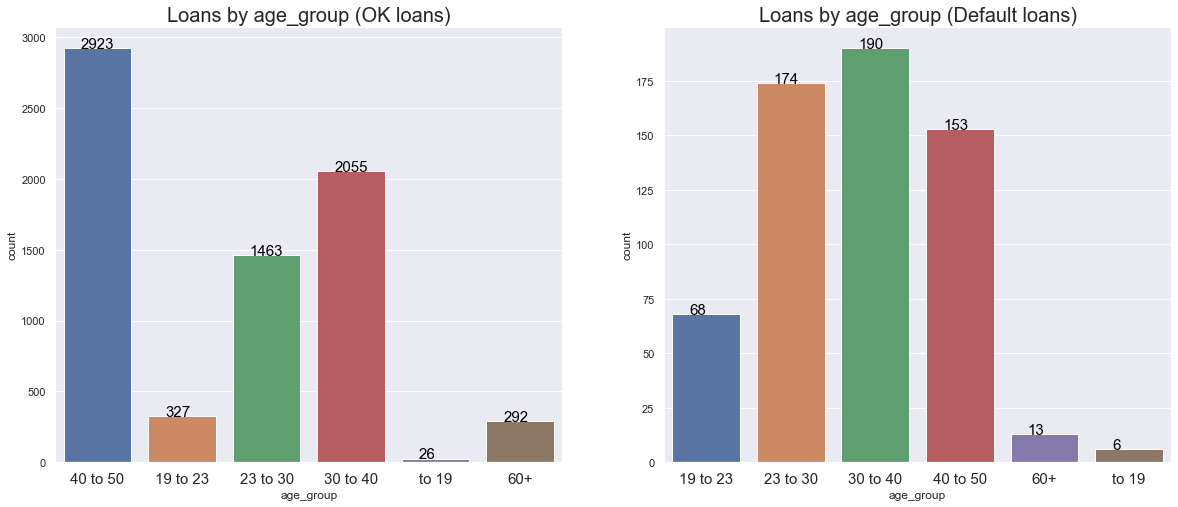

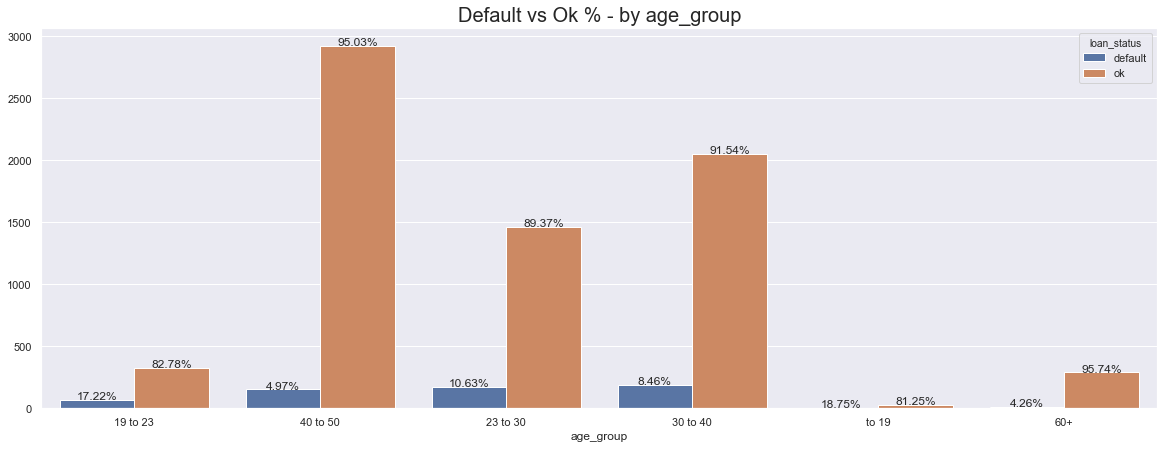

In [324]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='age_group',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by age_group (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='age_group',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by age_group (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['age_group'].unique())
ax3 = sns.countplot(x="age_group", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by age_group", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Avoid:
* 0 - 19 years old - 18.75%
* 19 - 23 years old - 17.22% 
* 23 - 30 years old - 10.63%
* 30 - 40 years old - 8.46%

### Good options:
* 40 - 50 years old - 4.97%
* 60+ years old - 4.26% 

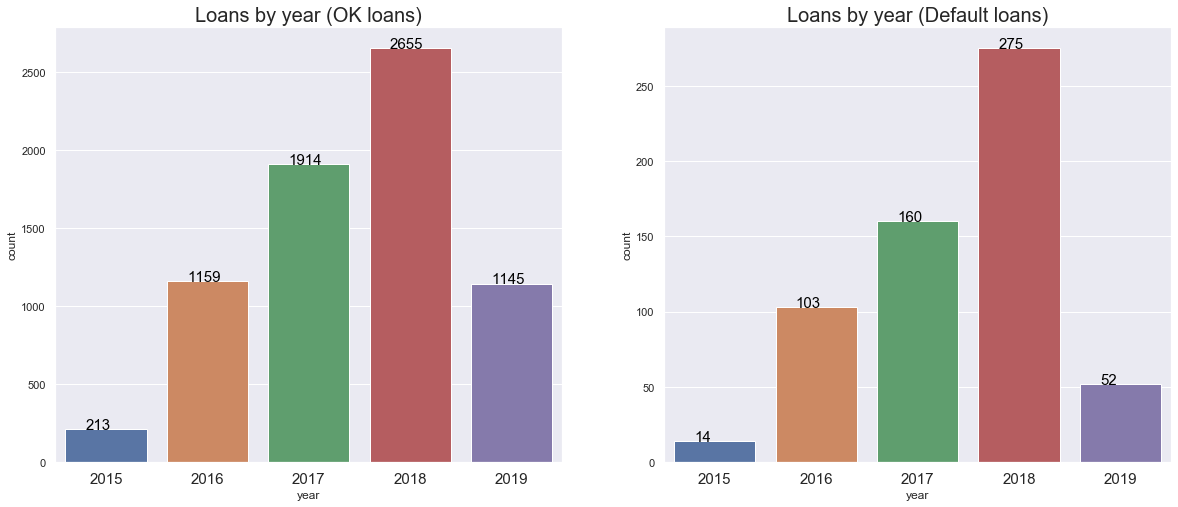

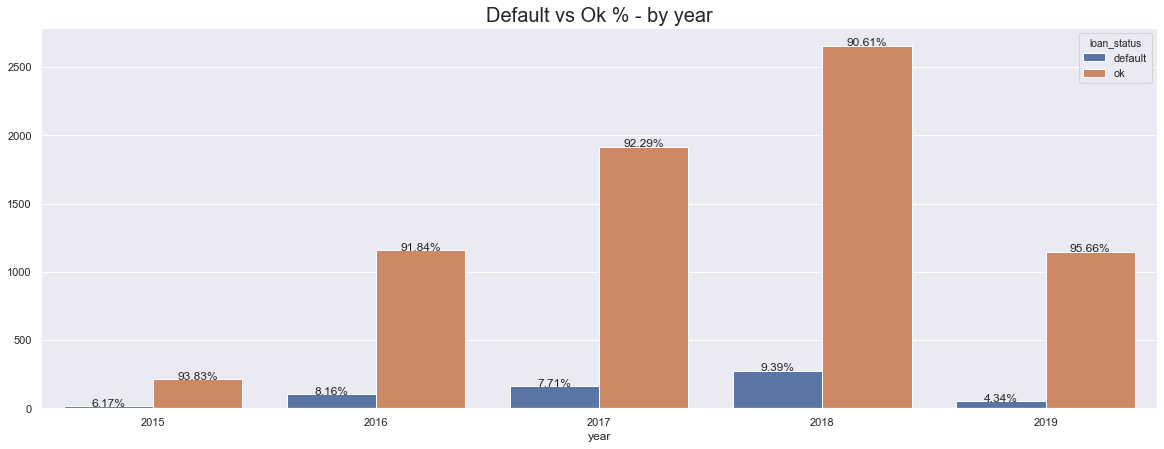

In [325]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='year',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by year (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='year',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by year (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['year'].unique())
ax3 = sns.countplot(x="year", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by year", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

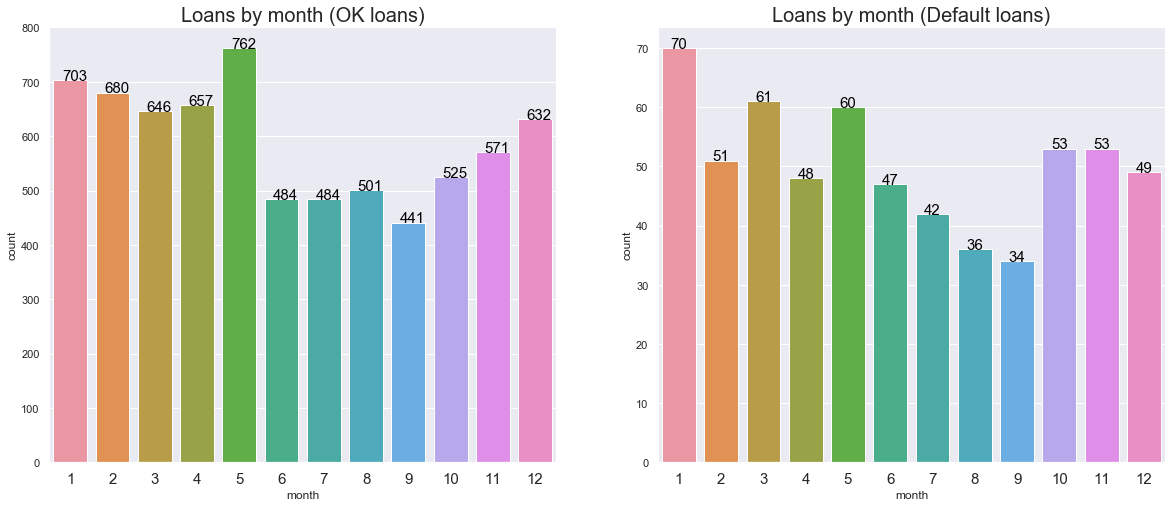

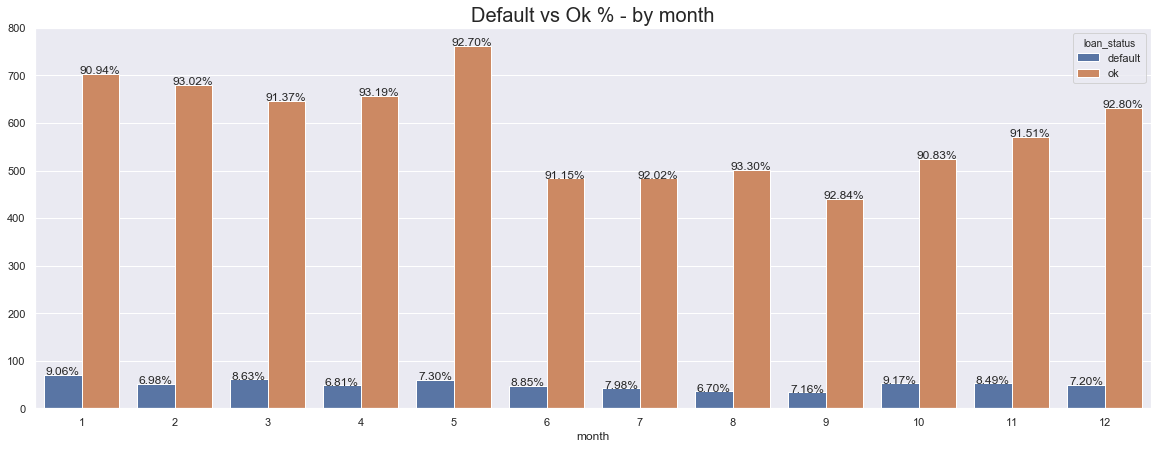

In [326]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='month',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by month (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='month',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by month (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['month'].unique())
ax3 = sns.countplot(x="month", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by month", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

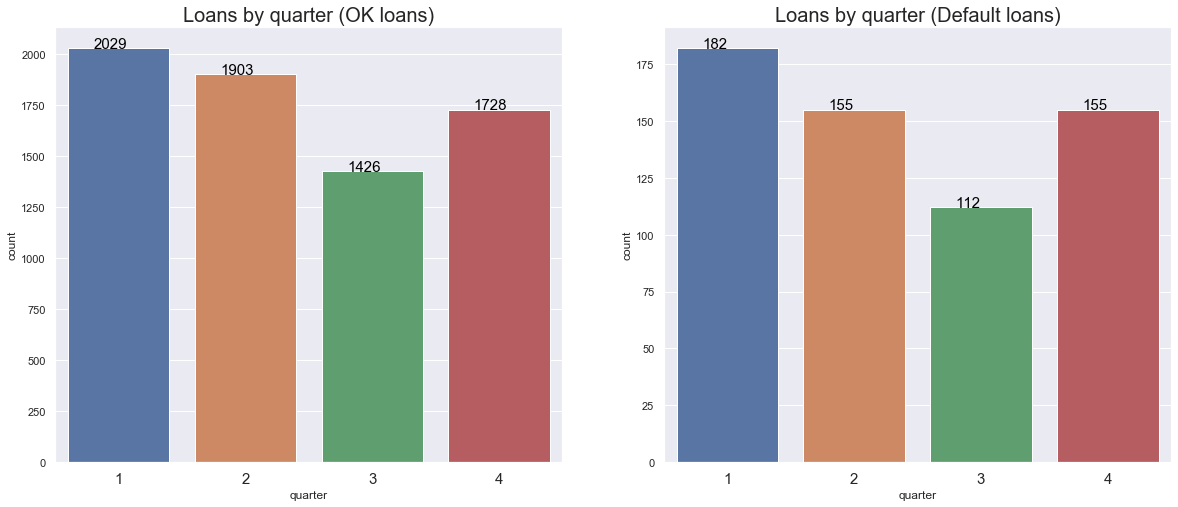

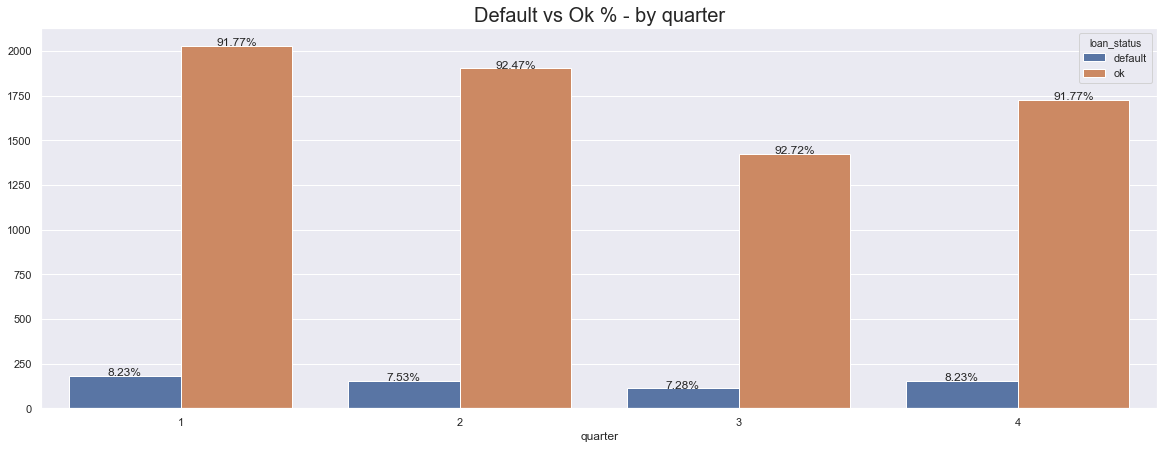

In [327]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='quarter',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by quarter (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='quarter',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by quarter (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['quarter'].unique())
ax3 = sns.countplot(x="quarter", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by quarter", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

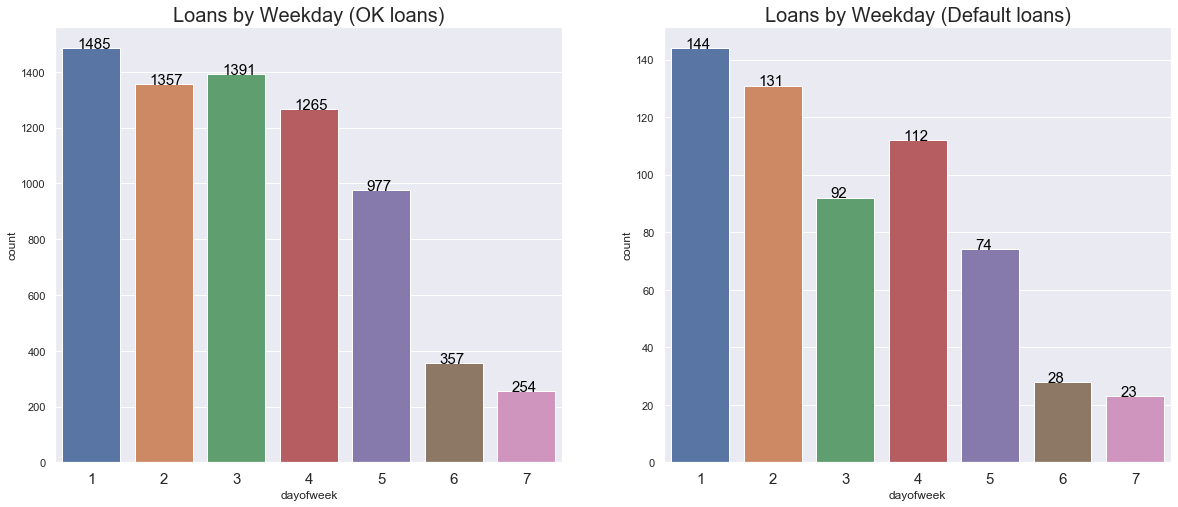

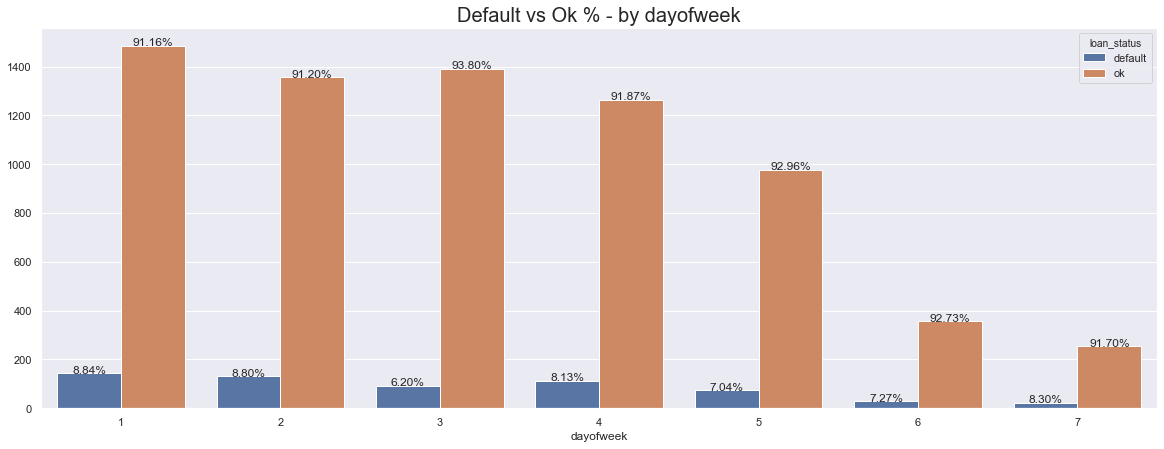

In [328]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='dayofweek',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Weekday (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='dayofweek',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Weekday (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['dayofweek'].unique())
ax3 = sns.countplot(x="dayofweek", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by dayofweek", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

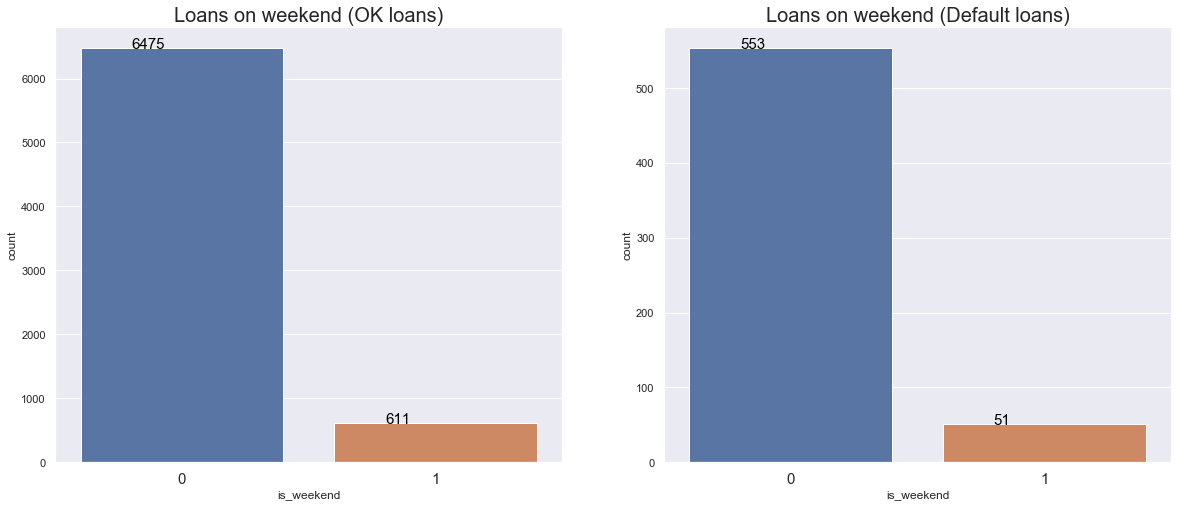

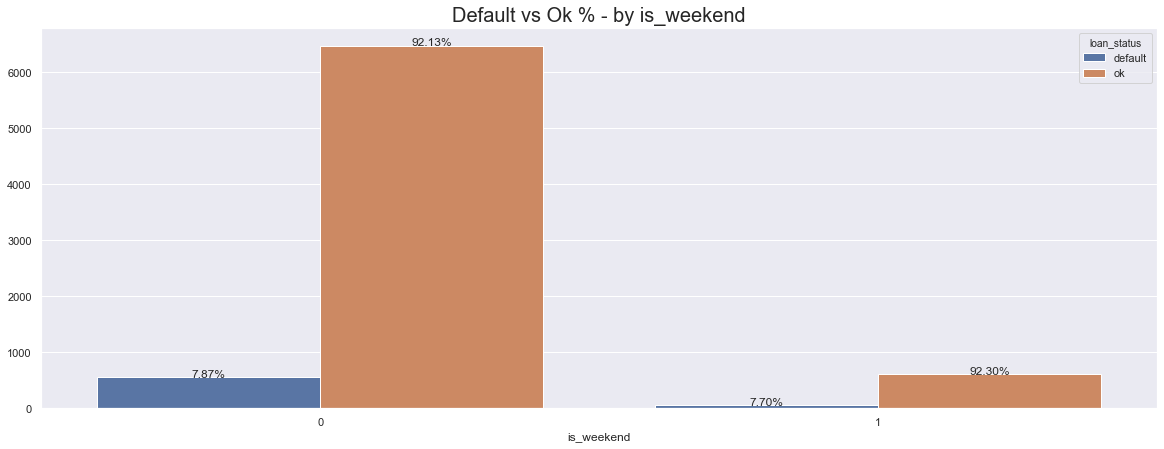

In [329]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='is_weekend',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans on weekend (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='is_weekend',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans on weekend (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['is_weekend'].unique())
ax3 = sns.countplot(x="is_weekend", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by is_weekend", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

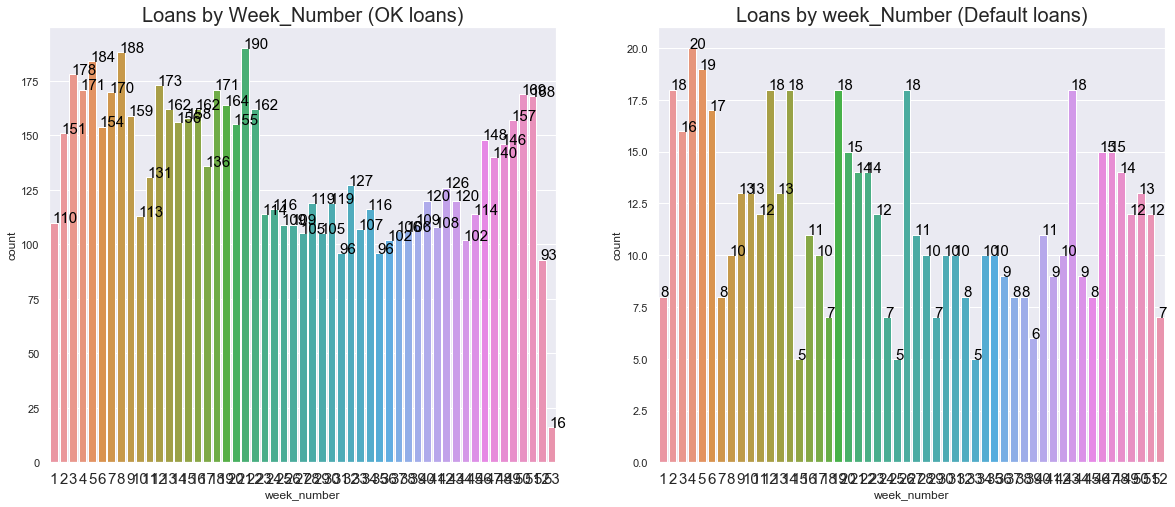

In [330]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='week_number',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Week_Number (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='week_number',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by week_Number (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

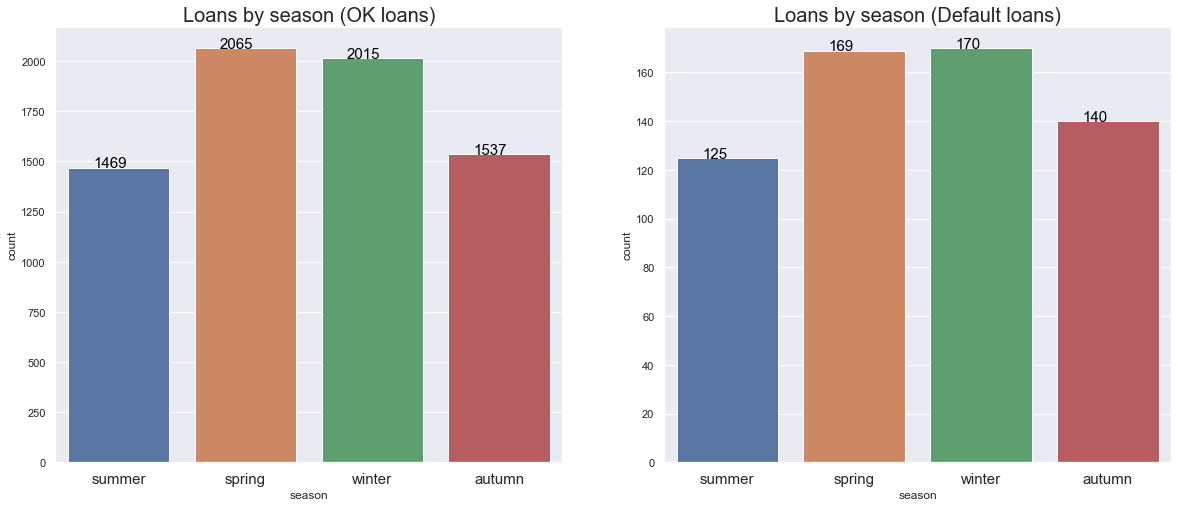

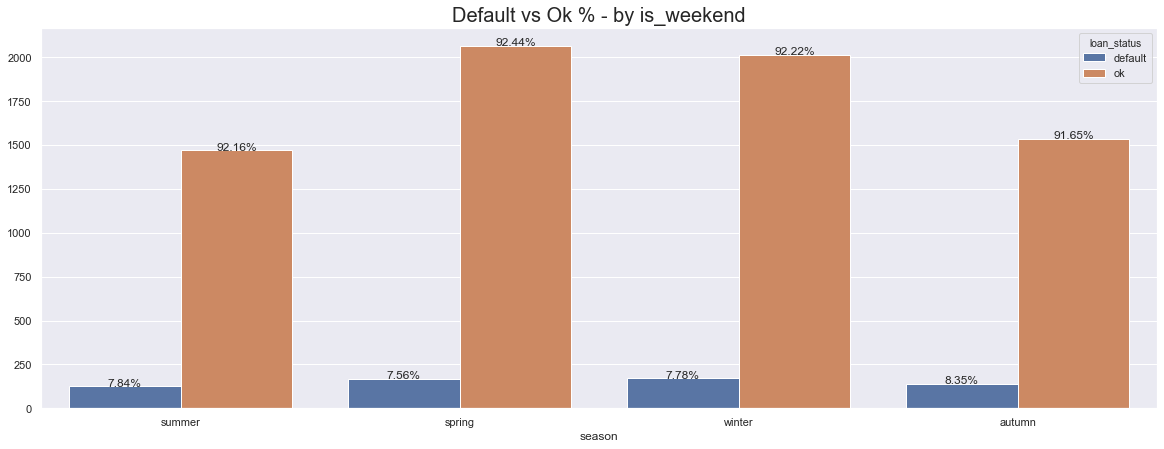

In [331]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='season',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by season (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='season',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by season (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['season'].unique())
ax3 = sns.countplot(x="season", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by is_weekend", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

Text(0.5, 1.0, 'Loans by is_holiday (Default loans)')

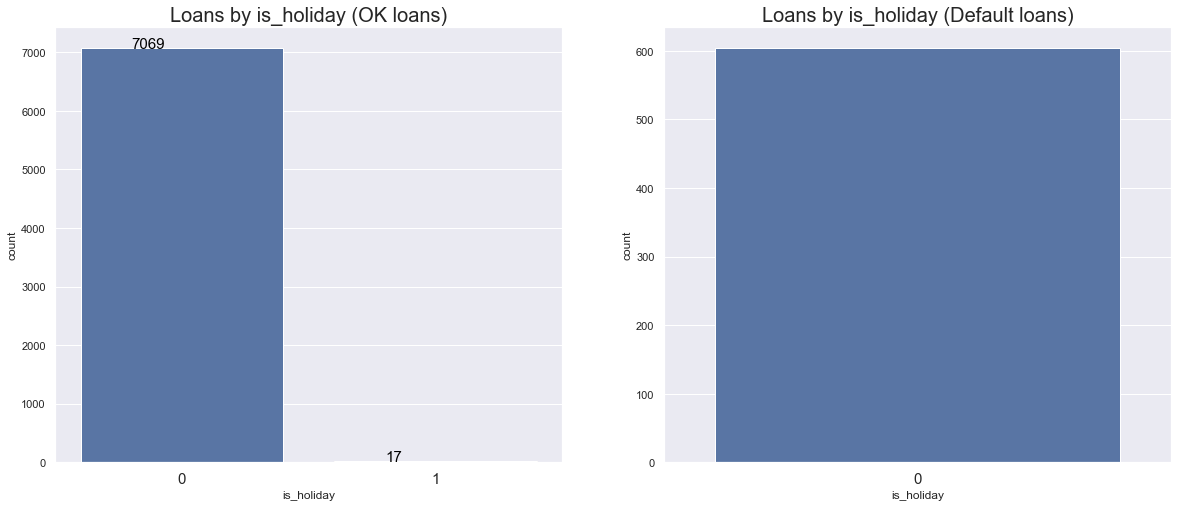

In [332]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='is_holiday',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by is_holiday (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='is_holiday',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by is_holiday (Default loans)", fontsize=20)



In [333]:
#occupation - seems to have too mane unique values - not need
len(df['occupation'].unique())

1743

In [334]:
#employ_how_long - Remove words
df.employ_how_long.unique()
df['employ_how_long'] = df['employ_how_long'].astype(str).apply(lambda x: x.strip('or more'))
df.employ_how_long = df.employ_how_long.astype(int)
df.employ_how_long.unique()

array([ 9, 72, 60, 15, 36,  3, 12, 18,  6, 24, 48], dtype=int64)

Text(0.5, 1.0, 'Employed months at current work')

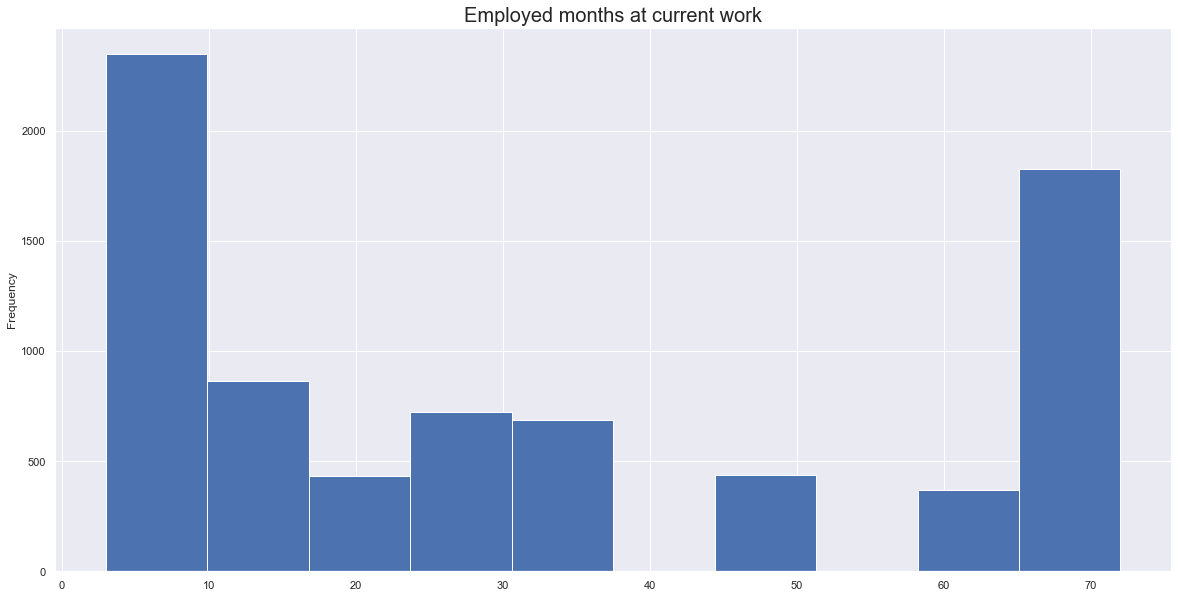

In [335]:
plt.figure(figsize=(20,10))
df['employ_how_long'].plot.hist()
plt.title('Employed months at current work', fontsize=20)

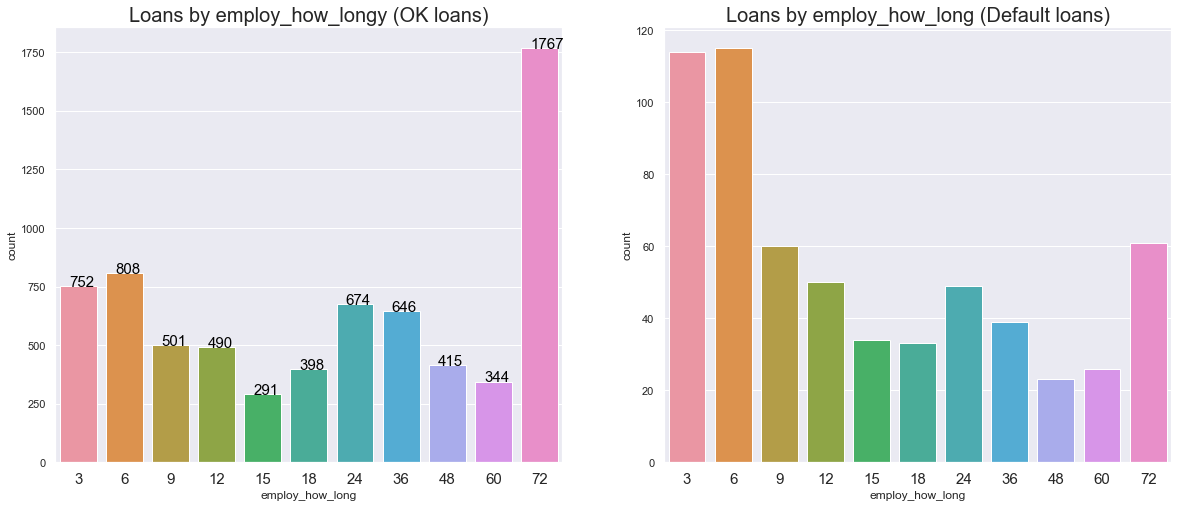

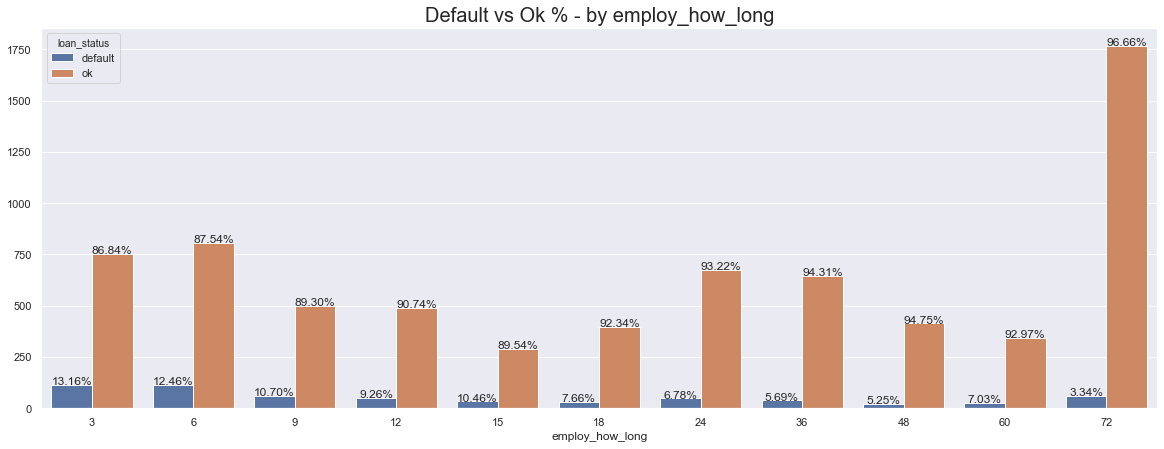

In [336]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='employ_how_long',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by employ_how_longy (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='employ_how_long',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by employ_how_long (Default loans)", fontsize=20)

plt.figure(figsize=(20,7))
order = sorted(df['employ_how_long'].unique())
ax3 = sns.countplot(x="employ_how_long", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by employ_how_long", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

* It seems, the longer person is employed, the lower is his risk to default
* The shorter is employment status, the higher risk of defaulting

In [337]:
df.years_working_in_total.unique()

array(['3', '33', '18', '30', '20', '4', '37', '8', '34', '15', '25',
       '32', '12', '19', '16', '10', '22', '5', '36', '6', '1', '29', '2',
       '7', '1.5', '17', '42', '13', '9', '11', '26', '23', '40', '24',
       '14', '31', '35', '21', '39', '28', '27', '44', '3,5', '3.5', '45',
       '41', '0.4', '1.8701', '38', '0.5', '0', '20m', '43', '16 metu',
       '0.3', '5.5', '2.5', '0,4', '0.6', '1.3', '1.6', '1 metai', '2, 4',
       '2m', '5 metai', '0.7', '0.8', '7.5', '47', '1.2', '0,6', '1,5',
       '0,3', '2,5', '1.8', '4.5', '0.9', '8 men', '1.6m', '46',
       '5 mėnesiai', '0,8', '4men', 'virs 10', '2016 08 04', '1metai',
       '10 metų', '20 metu', '9m', '1m', '20 metų', '1.5 m', '4 metai',
       '3 metai', '25+', 'apie 10 m.', '6 metai', '17m.', '2metai'],
      dtype=object)

In [338]:
df.years_working_in_total = df.years_working_in_total.str.replace('[^0-9]', '')
df.years_working_in_total = df.years_working_in_total.astype('int8')

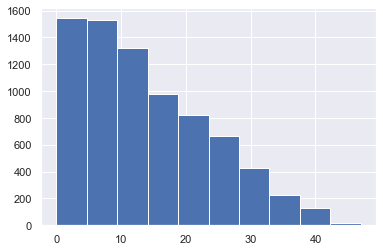

In [339]:
#some workers are working more years than they are aged. Seems this column may be corrupted
df[df.years_working_in_total < df.age].years_working_in_total.hist()

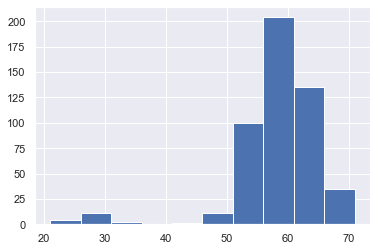

In [340]:
#Dont use - years_working_in_total - may be corrupted
df[df.years_working_in_total > 30].age.hist()

Text(0.5, 1.0, 'monthly_income EUR/Month')

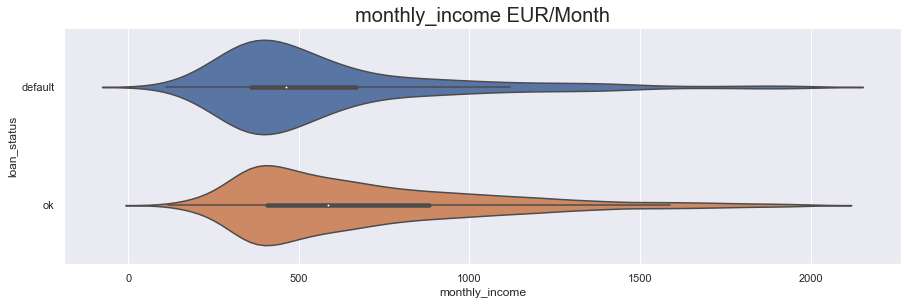

In [341]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x='monthly_income', y='loan_status', data=df[df['monthly_income']<2000],) 
ax.set_title('monthly_income EUR/Month', fontsize=20)

Text(0.5, 1.0, 'monthly_expenses EUR/Month')

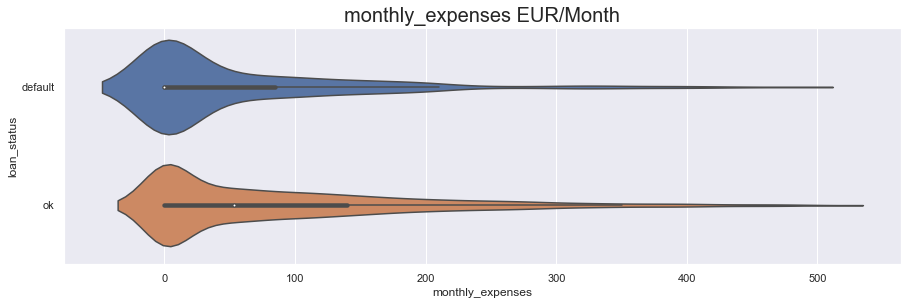

In [342]:
#Drop monthly_expenses - becuase it seems suspicious that more than 50% of people declare ti have expenses less than 100$
plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax = sns.violinplot(x='monthly_expenses', y="loan_status", data=df[df['monthly_expenses']<500],) 
ax.set_title('monthly_expenses EUR/Month', fontsize=20)

Text(0.5, 1.0, 'available_income EUR/Month')

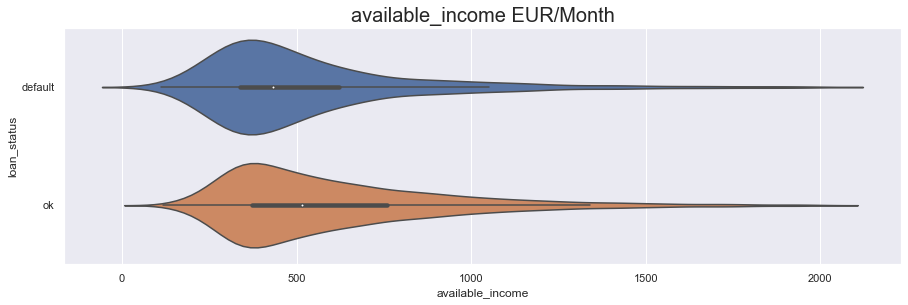

In [343]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='available_income', y='loan_status', data=df[df['available_income']<2000],) 
ax.set_title('available_income EUR/Month', fontsize=20)

Text(0.5, 1.0, 'Debt to Income ration')

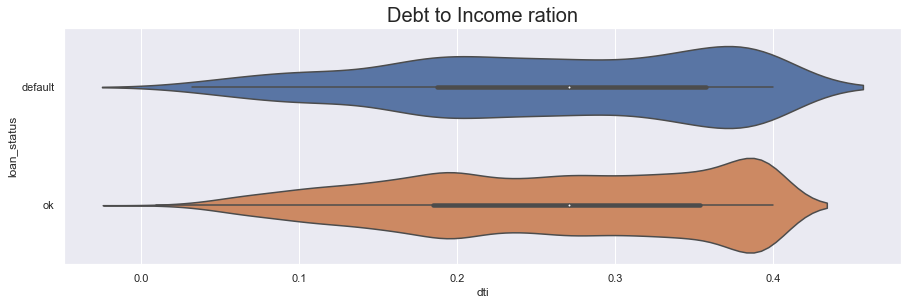

In [344]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='dti', y='loan_status',data=df,) 
ax.set_title('Debt to Income ration', fontsize=20)

Text(0.5, 1.0, 'outstanding_debts')

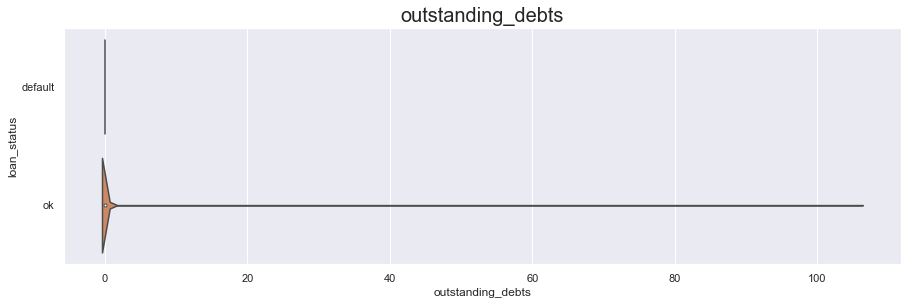

In [345]:
#Drop outstanding debs - seems that no loan takes had any debts
plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='outstanding_debts', y='loan_status', data=df,) 
ax.set_title('outstanding_debts', fontsize=20)

In [346]:
df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group
804,28085,2019-06-01,2019-06-03,2019-07-02,1,1,Kestas1997,"""28085-Automobilis",Car,D,0,1655,45,0.27,0.27,1655.00,68.10,0.00,0.00,204.3,default,FR,Male,Balbieriškis,22,Vocational education,Employed,Technikos priežiūros darbuotojas / Maintenance...,9,3,0,Single,2019-06-01 00:00:00,393,79,314,0.3743,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
805,28084,2019-06-01,2019-06-04,2019-07-04,1,1,92178929,"""28084-Refinansavimas",Consolidation of Other Loans,A,0,1800,15,0.12,0.12,1471.02,134.69,328.98,50.74,0.0,ok,FR,Male,Kaunas,53,Vocational education,Employed,Sandelininkas / Warehouse worker,72,33,0,Married,2019-06-01 00:00:00,906,0,906,0.1487,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
806,28083,2019-06-01,2019-06-04,2019-07-04,1,1,Saulyte3424,"""28083-Vartojimo",Other Purposes,C,0,500,24,0.20,0.20,451.46,27.39,48.54,24.20,0.0,ok,FR,Female,Utena,42,Vocational education,Employed,Vadybininkė / Manager,72,18,0,Married,2019-06-01 00:00:00,601,206,395,0.3883,0,2018-08-24 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
807,28080,2019-06-01,2019-06-04,2019-07-04,1,1,62775937,"""28080-Refinansavimas",Consolidation of Other Loans,D,0,1035,36,0.26,0.26,1001.58,47.17,33.42,44.50,0.0,ok,FR,Female,Šiaulių r. sav. Kairių sen. Eimučių k.,22,Vocational education,Employed,Baldų apmušėja / Furniture upholstered,9,3,0,Single,2019-06-01 00:00:00,487,65,422,0.2303,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
809,28066,2019-06-01,2019-06-05,2019-07-05,1,1,Jj22,"""28066-Vartojimo",Other Purposes,D,0,885,30,0.26,0.26,847.04,44.96,37.96,37.95,0.0,ok,FR,Female,Joniškis,56,Vocational education,Employed,Kepėja / Baker,60,30,1,Married,2019-06-01 00:00:00,853,91,762,0.1594,0,2018-09-06 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50


### Features selection
Based on dataset we see that only following feature may be of value for models

### To use:
1. listing_category
2. loan_amount
3. loan_period
4. effective_rate
5. monthly_installment
6. gender
8. age
9. education
10. employment_status
12. employ_how_long
14. dependants
15. marital_status
16. monthly_income
18. available_income
19. dti
21. year of loan
22. month of loan
23. quarter of loan
24. dayofweek - monday to sunday
25. is_weekend - if loan was created on weekened
26. dayofmonth - day number in a month
27. week_number - number of week in a year
28. season - season when loan was taken
29. is_holiday - if loan was taken on holiday
30. dayofyear
31. age_group
### Not to use:
7. post_town - **Don't use** too many values
11. occupation **Dont use** - too many unique
13. years_working_in_total **Don't use** - corrupted, wrong collection
17. monthly_expenses **Don't use** - more than 50% of borrowers declare less than 100EUr/month expenses
20. outstanding_debts **Don't use** - no data is collected, most are 0

In [347]:
df

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group
804,28085,2019-06-01,2019-06-03,2019-07-02,1,1,Kestas1997,"""28085-Automobilis",Car,D,0,1655,45,0.2700,0.27,1655.00,68.10,0.00,0.00,204.3,default,FR,Male,Balbieriškis,22,Vocational education,Employed,Technikos priežiūros darbuotojas / Maintenance...,9,3,0,Single,2019-06-01 00:00:00,393,79,314,0.3743,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
805,28084,2019-06-01,2019-06-04,2019-07-04,1,1,92178929,"""28084-Refinansavimas",Consolidation of Other Loans,A,0,1800,15,0.1200,0.12,1471.02,134.69,328.98,50.74,0.0,ok,FR,Male,Kaunas,53,Vocational education,Employed,Sandelininkas / Warehouse worker,72,33,0,Married,2019-06-01 00:00:00,906,0,906,0.1487,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
806,28083,2019-06-01,2019-06-04,2019-07-04,1,1,Saulyte3424,"""28083-Vartojimo",Other Purposes,C,0,500,24,0.2000,0.20,451.46,27.39,48.54,24.20,0.0,ok,FR,Female,Utena,42,Vocational education,Employed,Vadybininkė / Manager,72,18,0,Married,2019-06-01 00:00:00,601,206,395,0.3883,0,2018-08-24 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
807,28080,2019-06-01,2019-06-04,2019-07-04,1,1,62775937,"""28080-Refinansavimas",Consolidation of Other Loans,D,0,1035,36,0.2600,0.26,1001.58,47.17,33.42,44.50,0.0,ok,FR,Female,Šiaulių r. sav. Kairių sen. Eimučių k.,22,Vocational education,Employed,Baldų apmušėja / Furniture upholstered,9,3,0,Single,2019-06-01 00:00:00,487,65,422,0.2303,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
809,28066,2019-06-01,2019-06-05,2019-07-05,1,1,Jj22,"""28066-Vartojimo",Other Purposes,D,0,885,30,0.2600,0.26,847.04,44.96,37.96,37.95,0.0,ok,FR,Female,Joniškis,56,Vocational education,Employed,Kepėja / Baker,60,30,1,Married,2019-06-01 00:00:00,853,91,762,0.1594,0,2018-09-06 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,38,2015-08-19,2015-08-25,2015-09-25,1,3,Elegi,"""Paskolu refinansavimui",Consolidation of Other Loans,D,0,2250,18,0.3156,0.30,0.00,158.52,2250.01,603.37,0.0,ok,B,Female,"Trakų rajonas, Bražuolės kaimas",40,Graduate,Employed,Barmenė,72,12,2,Married,-,420,0,420,0.3626,0,-,2015,8,3,3,Wednesday,0,19,231,34,summer,2,0,40 to 50
9010,28,2015-08-18,2015-08-21,2015-09-21,1,3,egle,"""Persiskolinti",Consolidation of Other Loans,C,0,2000,27,0.2583,0.25,0.00,1277.55,2000.01,458.90,0.0,ok,B,Female,Šilutė,36,Post graduate,Employed,Valstybės tarnautoja/Public servant,48,8,0,Single,2015-11-17 00:00:00,900,127,773,0.2496,0,-,2015,8,3,2,Tuesday,0,18,230,34,summer,2,0,30 to 40
9011,3,2015-08-13,2015-08-20,2015-09-20,1,3,Algirdas,"""Vartojimo paskola, vartojimui, mokinimosi išl...",Other Purposes,D,0,1300,24,0.2525,0.25,0.00,690.85,1299.99,294.96,0.0,ok,B,Male,Kaunas,29,Post graduate,Employed,Inžinierius-projektuotojas,9,2,0,Single,-,510,14,496,0.1635,0,-,2015,8,3,4,Thursday,0,13,225,33,summer,2,0,23 to 30
9012,2,2015-08-12,2015-08-28,2015-09-27,1,1,Bitute,"""Refinansavimas",Consolidation of Other Loans,C,0,2700,54,0.2582,0.20,473.87,85.03,2226.13,1855.32,0.0,ok,B,Female,Vilnius,33,Post graduate,Employed,Specialistė / Specialist,60,10,0,Single,-,590,0,590,0.1292,0,-,2015,8,3,3,Wednesday,0,12,224,33,summer,2,0,30 t

In [348]:
#Dropping unneeded columnts to free some memory
'''df = df.drop(columns=['loan_paid_date','first_installement_date','loan_paid_status','confirm_status',
                'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', 
                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',
                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])'''

"df = df.drop(columns=['loan_paid_date','first_installement_date','loan_paid_status','confirm_status',\n                'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', \n                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',\n                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])"

In [349]:
features = ['listing_category','credit_score','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti','year','month', 
            'quarter', 'dayofweek', 'is_weekend', 'dayofmonth', 'dayofyear',
            'week_number','season_number','is_holiday','age_group',]

target = ['loan_status']

In [350]:
df[features]

,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti,year,month,quarter,dayofweek,is_weekend,dayofmonth,dayofyear,week_number,season_number,is_holiday,age_group
804,Car,D,1655,45,0.2700,68.10,Male,22,Vocational education,Employed,9,0,Single,393,314,0.3743,2019,6,2,6,1,1,152,22,2,0,19 to 23
805,Consolidation of Other Loans,A,1800,15,0.1200,134.69,Male,53,Vocational education,Employed,72,0,Married,906,906,0.1487,2019,6,2,6,1,1,152,22,2,0,40 to 50
806,Other Purposes,C,500,24,0.2000,27.39,Female,42,Vocational education,Employed,72,0,Married,601,395,0.3883,2019,6,2,6,1,1,152,22,2,0,40 to 50
807,Consolidation of Other Loans,D,1035,36,0.2600,47.17,Female,22,Vocational education,Employed,9,0,Single,487,422,0.2303,2019,6,2,6,1,1,152,22,2,0,19 to 23
809,Other Purposes,D,885,30,0.2600,44.96,Female,56,Vocational education,Employed,60,1,Married,853,762,0.1594,2019,6,2,6,1,1,152,22,2,0,40 to 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,Consolidation of Other Loans,D,2250,18,0.3156,158.52,Female,40,Graduate,Employed,72,2,Married,420,420,0.3626,2015,8,3,3,0,19,231,34,2,0,40 to 50
9010,Consolidation of Other Loans,C,2000,27,0.2583,1277.55,Female,36,Post graduate,Employed,48,0,Single,900,773,0.2496,2015,8,3,2,0,18,230,34,2,0,30 to 40
9011,Other Purposes,D,1300,24,0.2525,690.85,Male,29,Post graduate,Employed,9,0,Single,510,496,0.1635,2015,8,3,4,0,13,225,33,2,0,23 to 30
9012,Consolidation of Other Loans,C,2700,54,0.2582,85.03,Female,33,Post graduate,Employed,60,0,Single,590,590,0.1292,2015,8,3,3,0,12,224,33,2,0,30 to 40


In [351]:
for feature in features:
    if df[feature].dtypes == 'object':
        df[feature] = df[feature].astype('category').cat.codes
    elif df[feature].dtypes == 'float64':
        df[feature] = df[feature].astype(int) 

## Separate data into train, validation, & test

Only when this is done, do increase unbalanced data and do fitting.

In [352]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df[features], df[target],random_state=1)

#test - 16%
#train, test = train_test_split(df, test_size=0.16, random_state=1)

#Validation - 20%
#train, validation = train_test_split(train, test_size=0.2, random_state=1)

In [353]:
y_train.loan_status.value_counts()

ok         5322
default     445
Name: loan_status, dtype: int64

In [354]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train, y_train = ros.fit_resample(X_train, y_train.loan_status)
y_train.value_counts()

ok         5322
default    5322
Name: loan_status, dtype: int64

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state=1)
clf = AdaBoostClassifier(n_estimators = 100,random_state=1)

In [358]:
rf.fit(X_train,y_train)
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [367]:
predictions1 = rf.predict(X_test)
rf.score(X_test,y_test)

0.9152366094643786

In [368]:
predictions2 = clf.predict(X_test)
clf.score(X_test,y_test)

0.7685907436297452

In [369]:
from sklearn.metrics import recall_score
print('RF Macro',recall_score(y_test, predictions1, average='macro'))
print('RF Micro',recall_score(y_test, predictions1, average='micro'))
print('RF weighted',recall_score(y_test, predictions1, average='weighted'))

from sklearn.metrics import recall_score
print('Macro',recall_score(y_test, predictions2, average='macro'))
print('Micro',recall_score(y_test, predictions2, average='micro'))
print('weighted',recall_score(y_test, predictions2, average='weighted'))

RF Macro 0.5618127754246353
RF Micro 0.9152366094643786
RF weighted 0.9152366094643786
Macro 0.7651403328627049
Micro 0.7685907436297452
weighted 0.7685907436297452


Feature ranking:
listing_category 1. feature 5 (0.202819)
credit_score 2. feature 1 (0.113805)
loan_amount 3. feature 2 (0.068837)
loan_period 4. feature 7 (0.059720)
effective_rate 5. feature 13 (0.055934)
monthly_installment 6. feature 14 (0.055036)
gender 7. feature 3 (0.049400)
age 8. feature 10 (0.048328)
education 9. feature 22 (0.046971)
employment_status 10. feature 21 (0.041369)
employ_how_long 11. feature 23 (0.035611)
dependants 12. feature 16 (0.026513)
marital_status 13. feature 8 (0.025580)
monthly_income 14. feature 19 (0.024921)
available_income 15. feature 12 (0.023177)
dti 16. feature 0 (0.020809)
year 17. feature 26 (0.019228)
month 18. feature 17 (0.019094)
quarter 19. feature 6 (0.018986)
dayofweek 20. feature 11 (0.016061)
is_weekend 21. feature 24 (0.010105)
dayofmonth 22. feature 18 (0.009073)
dayofyear 23. feature 9 (0.005268)
week_number 24. feature 20 (0.003259)
season_number 25. feature 25 (0.000096)
is_holiday 26. feature 15 (0.000000)
age_group 27. feature

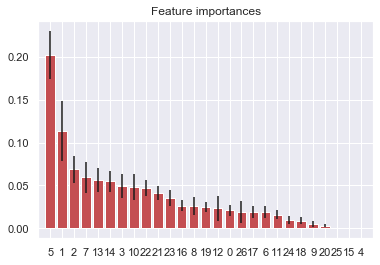

In [371]:
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train[features].shape[1]), indices)
plt.xlim([-1, X_train[features].shape[1]])
plt.show()

In [212]:
y_train.shape

(5767, 1)

In [142]:
train.shape

(5167, 32)

In [143]:
test.shape

(1231, 32)

In [144]:
validation.shape

(1292, 32)

In [145]:
train.loan_status.value_counts()

ok         4767
default     400
Name: loan_status, dtype: int64

In [146]:
test.loan_status.value_counts()

ok         1133
default      98
Name: loan_status, dtype: int64

In [147]:
validation.loan_status.value_counts()

ok         1186
default     106
Name: loan_status, dtype: int64

In [302]:
from imblearn.over_sampling import RandomOverSampler


In [149]:
X_train, y_train = train[features], train[target]

In [150]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train.loan_status)

In [151]:
y_resampled.value_counts()

ok         4767
default    4767
Name: loan_status, dtype: int64

## Preprocessing data

Using pipelines

In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer


#selection of Categorical and numerical columns
categorical_cols = X_resampled.select_dtypes(include=['object']).columns
numerical_cols = X_resampled.select_dtypes(include=['int64', 'float64']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [153]:
from sklearn.ensemble import RandomForestClassifier
#rf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('classifier', RandomForestClassifier(n_estimators = 100))])
rf = RandomForestClassifier(n_estimators = 100)

In [154]:
data = [train, validation, test]

for dataset in data:
    for feature in features:
        print(f'was {feature}:', dataset[feature].dtypes)
        if dataset[feature].dtypes == 'object':
            dataset[feature] = dataset[feature].astype('category').cat.codes
        elif dataset[feature].dtypes == 'float64':
            dataset[feature] = dataset[feature].astype(int) 
        print(f'now {feature}:', dataset[feature].dtypes)

was credit_score: object
now credit_score: int8
was loan_amount: int64
now loan_amount: int64
was loan_period: int64
now loan_period: int64
was effective_rate: float64
now effective_rate: int32
was monthly_installment: float64
now monthly_installment: int32
was gender: object
now gender: int8
was age: int64
now age: int64
was education: object
now education: int8
was employment_status: object
now employment_status: int8
was employ_how_long: int32
now employ_how_long: int32
was dependants: int64
now dependants: int64
was marital_status: object
now marital_status: int8
was monthly_income: int64
now monthly_income: int64
was available_income: int64
now available_income: int64
was dti: float64
now dti: int32
was year: int64
now year: int64
was month: int64
now month: int64
was quarter: int64
now quarter: int64
was dayofweek: int64
now dayofweek: int64
was is_weekend: int32
now is_weekend: int32
was dayofmonth: int64
now dayofmonth: int64
was dayofyear: int64
now dayofyear: int64
was week_n

c:\users\kompiuteris\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\kompiuteris\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [219]:
train.loan_status = train.loan_status.astype('category').cat.codes
test.loan_status = test.loan_status.astype('category').cat.codes
validation.loan_status = validation.loan_status.astype('category').cat.codes
df.loan_status = df.loan_status.astype('category').cat.codes

In [220]:
rf.fit(X_train,y_train)

c:\users\kompiuteris\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
rf.score(X_test,y_test)

0.9188767550702028

In [207]:
rf.fit(X_resampled,y_resampled)

ValueError: could not convert string to float: 'C'

In [137]:
rf.score(validation[features],validation[target])

0.9195046439628483

In [215]:
rf.score(test[features],test[target])

0.9195775792038993

Feature ranking:
listing_category 1. feature 5 (0.114662)
credit_score 2. feature 13 (0.080626)
loan_amount 3. feature 2 (0.080300)
loan_period 4. feature 14 (0.077443)
effective_rate 5. feature 22 (0.063685)
monthly_installment 6. feature 7 (0.063503)
gender 7. feature 21 (0.059360)
age 8. feature 1 (0.054395)
education 9. feature 3 (0.052868)
employment_status 10. feature 10 (0.047490)
employ_how_long 11. feature 23 (0.046194)
dependants 12. feature 19 (0.035704)
marital_status 13. feature 16 (0.029030)
monthly_income 14. feature 17 (0.027918)
available_income 15. feature 0 (0.024909)
dti 16. feature 12 (0.023445)
year 17. feature 11 (0.023129)
month 18. feature 26 (0.021458)
quarter 19. feature 8 (0.020322)
dayofweek 20. feature 24 (0.014677)
is_weekend 21. feature 6 (0.013989)
dayofmonth 22. feature 18 (0.013507)
dayofyear 23. feature 9 (0.006366)
week_number 24. feature 20 (0.005003)
season_number 25. feature 25 (0.000016)
is_holiday 26. feature 15 (0.000000)
age_group 27. feature

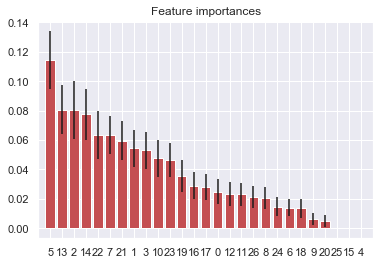

In [222]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_resampled[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_resampled[features].shape[1]), indices)
plt.xlim([-1, X_resampled[features].shape[1]])
plt.show()

was credit_score: int8
now credit_score: int8
was loan_amount: int64
now loan_amount: int64
was loan_period: int64
now loan_period: int64
was effective_rate: int32
now effective_rate: int32
was monthly_installment: int32
now monthly_installment: int32
was gender: int8
now gender: int8
was age: int64
now age: int64
was education: int8
now education: int8
was employment_status: int8
now employment_status: int8
was employ_how_long: int32
now employ_how_long: int32
was dependants: int64
now dependants: int64
was marital_status: int8
now marital_status: int8
was monthly_income: int64
now monthly_income: int64
was available_income: int64
now available_income: int64
was dti: int32
now dti: int32
was year: int64
now year: int64
was month: int64
now month: int64
was quarter: int64
now quarter: int64
was dayofweek: int64
now dayofweek: int64
was is_weekend: int32
now is_weekend: int32
was dayofmonth: int64
now dayofmonth: int64
was dayofyear: int64
now dayofyear: int64
was week_number: int64
now

In [194]:
validation

,listing_id,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group
2525,18270,2018-11-07,6,D,500,45,0,515,1,0,24,1,0,6,1,3,465,302,0,2018,11,4,3,Wednesday,0,7,311,45,autumn,3,0,1
6026,8915,2017-10-02,4,C,1650,58,0,54,0,1,25,3,0,3,0,3,230,202,0,2017,10,4,1,Monday,0,2,275,40,autumn,3,0,1
5761,9625,2017-11-09,6,B,440,12,0,40,1,1,28,3,0,60,0,3,597,597,0,2017,11,4,4,Thursday,0,9,313,45,autumn,3,0,1
2828,17328,2018-09-21,6,B,4370,36,0,164,1,0,46,0,0,9,0,3,503,503,0,2018,9,3,5,Friday,0,21,264,38,autumn,3,0,3
8827,854,2015-12-15,2,B,1000,30,0,829,1,0,46,0,0,18,0,2,460,355,0,2015,12,4,2,Tuesday,0,15,349,51,winter,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,275,2015-09-17,6,B,700,24,0,36,1,0,35,3,0,72,1,1,700,700,0,2015,9,3,4,Thursday,0,17,260,38,autumn,3,0,2
7460,4719,2017-01-04,1,B,2390,48,0,73,1,0,43,1,0,9,2,1,1567,1318,0,2017,1,1,3,Wednesday,0,4,4,1,winter,4,0,3
2052,20987,2019-01-14,6,D,340,24,0,19,1,0,36,1,0,60,1,3,437,287,0,2019,1,1,1,Monday,0,14,14,3,winter,4,0,2
7204,5326,2017-02-13,4,B,2310,30,0,511,1,1,27,1,0,24,0,3,327,327,0,2017,2,1,1,Monday,0,13,44,7,winter,4,0,1


In [195]:
rf.score(validation[features],validation[target])

TypeError: '<' not supported between instances of 'str' and 'int'

In [159]:
importances = rf.feature_importances_

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
std = np.std([tree.feature_importances_ for tree in m.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df[features].shape[1]), indices)
plt.xlim([-1, df[features].shape[1]])
plt.show()

In [29]:
for feature in features:
    print(f'was {feature}:', df[feature].dtypes)
    if df[feature].dtypes == 'object':
        df[feature] = df[feature].astype('category').cat.codes
    elif df[feature].dtypes == 'float64':
        df[feature] = df[feature].astype(int) 
    print(f'now {feature}:', df[feature].dtypes)

was listing_category: object
now listing_category: int8
was loan_amount: int64
now loan_amount: int64
was loan_period: int64
now loan_period: int64
was effective_rate: float64
now effective_rate: int32
was monthly_installment: float64
now monthly_installment: int32
was gender: object
now gender: int8
was age: int64
now age: int64
was education: object
now education: int8
was employment_status: object
now employment_status: int8
was employ_how_long: int32
now employ_how_long: int32
was dependants: int64
now dependants: int64
was marital_status: object
now marital_status: int8
was monthly_income: int64
now monthly_income: int64
was available_income: int64
now available_income: int64
was dti: float64
now dti: int32


In [30]:
df.head()

,listing_id,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti
0,32692,2019-09-04,1,D,3305,36,0,150,ok,0,21,3,0,6,0,3,503,503,0
1,32691,2019-09-04,6,D,1900,36,0,86,ok,1,25,3,0,3,0,3,345,328,0
2,32687,2019-09-04,6,C,665,12,0,63,ok,0,41,0,0,60,1,1,1060,863,0
3,32674,2019-09-04,6,B,1040,12,0,96,ok,1,26,1,0,36,1,1,484,484,0
4,32666,2019-09-04,6,B,2830,24,0,143,ok,0,33,2,0,15,2,1,849,828,0


## Building Model 1
Predict credit score.


Classification problem, since Ok or Default.


- Random Forest Classifier
- XG Boost classifier
- Other classifiers?

In [211]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'sklearn'

In [32]:
df['credit_score'].unique()

array(['D', 'C', 'B', 'A', 'A*'], dtype=object)

In [33]:
df['credit_score'] = df['credit_score'].astype('category').cat.codes

In [34]:
target = 'credit_score'

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [36]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=100)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
train_score = m.score(X_train, y_train)
test_score = m.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

Train score 1.0 
Test score 0.5618327402135231


### Feature importance | Model 1

In [38]:
importances = .feature_importances_

Feature ranking:
listing_category 1. feature 6 (0.133520)
loan_amount 2. feature 2 (0.129175)
loan_period 3. feature 4 (0.123483)
effective_rate 4. feature 1 (0.121891)
monthly_installment 5. feature 12 (0.117621)
gender 6. feature 13 (0.115244)
age 7. feature 9 (0.076331)
education 8. feature 0 (0.044918)
employment_status 9. feature 7 (0.038606)
employ_how_long 10. feature 10 (0.036019)
dependants 11. feature 11 (0.033673)
marital_status 12. feature 5 (0.021793)
monthly_income 13. feature 8 (0.007726)
available_income 14. feature 14 (0.000000)
dti 15. feature 3 (0.000000)


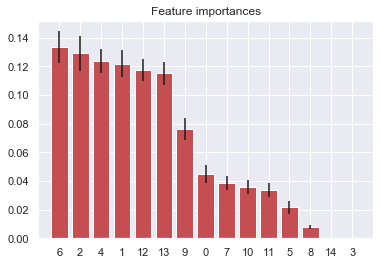

In [39]:
std = np.std([tree.feature_importances_ for tree in m.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df[features].shape[1]), indices)
plt.xlim([-1, df[features].shape[1]])
plt.show()

In [40]:
features_important = ['loan_amount','loan_period','effective_rate','monthly_installment','gender','age','education']
X_train, X_test, y_train, y_test = train_test_split(df[features_important], df[target], test_size=0.15)
m2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
m2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [41]:
train_score = m2.score(X_train, y_train)
test_score = m2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

KeyboardInterrupt: 

### Model preformance
Model 1 (with most features) Test score ~57%

Model 1 (with imporant features only) test score ~70%

## Building Model 2
Predict if customer will default.

In [ ]:
#prediction target 2
df['loan_status'].unique()

In [ ]:
#lets keep only okey and default values.
df['loan_status'].hist()

In [ ]:
df = df[(df['loan_status'] == 'ok') | (df['loan_status'] == 'default')]
df['loan_status'].hist()

In [ ]:
#Given some loans are new, so borrowers still can fail. Let's use last default client as benchmark
df[df.loan_status == 'default' ]
df.head()
#Last date -2019-06-03

In [ ]:
df = df[df['creation_date'] < '2019-06-02']
df.shape

In [ ]:
df

In [ ]:
df['loan_status'] = df['loan_status'].astype('category').cat.codes

In [ ]:
target = 'loan_status'
features = ['listing_category','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [ ]:
model2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
%time model2.fit(X_train, y_train)

In [ ]:
train_score = model2.score(X_train, y_train)
test_score = model2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

### Model 2 (Feature importance)

In [ ]:
importances = model2.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df[features].shape[1]), indices)
plt.xlim([-1, df[features].shape[1]])
plt.show()

In [ ]:
important_features = ['loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status'] #'listing_category'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[important_features], df[target], test_size=0.25)

In [ ]:
model2v2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
%time model2v2.fit(X_train, y_train)

In [ ]:
train_score = model2v2.score(X_train, y_train)
test_score = model2v2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

## Comments to finbee.lt
1. Would be nice to have more recent data
2. Some data is definitely collected wrongly (years_working_in_total)
3. monthly_expenses - More than 50% have lower than 100EUR/month - very suspicious
4. outstanding_debts - most are 0, no data is collected